
---

# Proyek Pengelompokan Pelanggan Menggunakan Algoritma KMeans

Dalam proyek ini, saya akan melakukan pengelompokan (clustering) pelanggan berdasarkan variabel atau fitur yang ada. Pengelompokan ini menggunakan algoritma KMeans. Langkah-langkah yang dilakukan dalam proyek ini meliputi:

1. **Import Library**:
   - Mengimpor semua library yang diperlukan untuk analisis dan pemodelan.

2. **Feature Engineering**:
   - Mengolah dan merekayasa fitur untuk meningkatkan kualitas data dan mempersiapkannya untuk pemodelan.

3. **Remove Outlier**:
   - Mengidentifikasi dan menghapus outlier atau data pencilan yang dapat mempengaruhi hasil analisis.

4. **Exploratory Data Analysis (EDA)**:
   - Melakukan analisis data eksploratif untuk memahami distribusi data dan hubungan antar variabel.

5. **Reduksi Dimensi**:
   - Menggunakan teknik reduksi dimensi untuk mengurangi kompleksitas data tanpa kehilangan informasi penting.

6. **Clustering**:
   - Menerapkan algoritma KMeans untuk mengelompokkan pelanggan berdasarkan fitur yang ada.

7. **Evaluasi Model**:
   - Mengevaluasi hasil clustering untuk memastikan kualitas dan validitas pengelompokan yang dilakukan.

8. **Profiling**:
   - Melakukan profiling terhadap setiap kelompok pelanggan yang dihasilkan untuk memahami karakteristik unik dari masing-masing kelompok.

---



data diambil dari : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# import library

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from matplotlib import colors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


warnings.filterwarnings("ignore")

# input dataset

In [69]:
data = pd.read_csv("marketing_campaign.csv" , sep="\t")
print("banyaknya data point di dataset ini adalah : " , len(data))
data.head()

banyaknya data point di dataset ini adalah :  2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [70]:
print("Jumlah kolom bertipe Number : " , len(data.select_dtypes(exclude=[object]).columns))
print("Jumlah kolom bertipe Object : " , len(data.select_dtypes(include=[object]).columns) ," \n")

data.info()

Jumlah kolom bertipe Number :  26
Jumlah kolom bertipe Object :  3  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds      

In [71]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

# missing value

In [72]:
display(data.isna().sum())

print("Total missing value yang ada sebanyak : " , sum(data.isna().sum()))

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Total missing value yang ada sebanyak :  24


In [73]:
data_no_null = data.dropna()
print("banyaknya data point setelah menghapus missing value : " , len(data))

banyaknya data point setelah menghapus missing value :  2240


# Feature Enginerring

In [74]:
data_no_null.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  

[3 rows x 29 columns]

#### jadi saya akan membuat atribut :

- Age ( umur )
- CustomerAgeInDays ( lamanya pelanggan setelah berlangganan dalam hari )
- Kids ( jumlah anak di rumah dari balita hingga remaja )
- isParent ( apakah pelanggan seorang orang tua )
- spent ( menambahkan semua pengeluaran di setiap kategori )
- Marital_Status ( mengubah nilai menjadi  2 kategori )
- Education ( mengubah nilai menjadi 3 kategori )
- Family_number ( menghitung semua orang yang berada di rumah )
- Total_cmp ( menambahkan keikut sertaan dalam setiap cmp )


In [75]:
data_no_null["Age"] = datetime.date.today().year - data_no_null["Year_Birth"]

print("pelanggan dengan umur paling tua : " , max(data_no_null["Age"]))
print("pelanggan dengan umur paling tua : " , min(data_no_null["Age"]))

pelanggan dengan umur paling tua :  131
pelanggan dengan umur paling tua :  28


In [76]:
data_no_null["Dt_Customer"] = pd.to_datetime(data_no_null["Dt_Customer"]).dt.date

data_no_null["CustomerAgeInDays"] = datetime.date.today() - data_no_null["Dt_Customer"]
data_no_null["CustomerAgeInDays"] = data_no_null["CustomerAgeInDays"].astype(str)
data_no_null["CustomerAgeInDays"] = [ x.replace("days" , "") for x in data_no_null["CustomerAgeInDays"]]
data_no_null["CustomerAgeInDays"] = data_no_null["CustomerAgeInDays"].astype(int)

print("paling lama pelanggan menjadi pelanggan selama     : " , max(data_no_null["CustomerAgeInDays"]) , "hari /" , int(max(data_no_null["CustomerAgeInDays"]) / 30) ,"bulan")
print("paling sebentar pelanggan menjadi pelanggan selama : " , min(data_no_null["CustomerAgeInDays"]) , "hari /" , int(min(data_no_null["CustomerAgeInDays"]) / 30) ,"bulan")

paling lama pelanggan menjadi pelanggan selama     :  4525 hari / 150 bulan
paling sebentar pelanggan menjadi pelanggan selama :  3462 hari / 115 bulan


In [77]:
data_no_null["kids"] = data_no_null["Kidhome"] + data_no_null["Teenhome"]
print("pelanggan dengan anak terbanyak  : " , max(data_no_null["kids"]))
print("pelanggan dengan anak tersedikit : " , min(data_no_null["kids"]))

pelanggan dengan anak terbanyak  :  3
pelanggan dengan anak tersedikit :  0


In [78]:
data_no_null["isParent"] = np.where(data_no_null["kids"] > 0 , 1 , 0)

In [79]:
data_no_null["spent"] = data_no_null["MntFishProducts"] + data_no_null["MntFruits"] + data_no_null["MntGoldProds"] + data_no_null["MntMeatProducts"] + data_no_null["MntSweetProducts"] + data_no_null["MntWines"]

print("pelanggan dengan Spent terbanyak  : " , max(data_no_null["spent"]))
print("pelanggan dengan Spent tersedikit : " , min(data_no_null["spent"]))

pelanggan dengan Spent terbanyak  :  2525
pelanggan dengan Spent tersedikit :  5


In [80]:
display(data_no_null["Marital_Status"].value_counts())

data_no_null["Marital_Status"] = data_no_null["Marital_Status"].replace({"Married" : "Partner" , "Together" : "Partner" , "Single" : "Single" , "Divorced" : "Single" , "Widow" : "Single" , "Alone" : "Single" ,"Absurd" : "Single" , "YOLO" : "Single"} ) 

display(data_no_null["Marital_Status"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Partner    1430
Single      786
Name: Marital_Status, dtype: int64

In [81]:
display(data_no_null["Education"].value_counts())

data_no_null["Education"] = data_no_null["Education"].replace({"Basic" : "Undergraduate" , "2n Cycle" : "Undergraduate" , "Graduation" : "Graduate" , "Master" : "Postgraduate" , "PhD" : "Postgraduate"})

display(data_no_null["Education"].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [82]:
data_no_null["family_number"] = np.where(data_no_null["Marital_Status"] == "Partner" , 2 , 1) + data_no_null["kids"]

print("pelanggan dengan anggota keluarga terbanyak : " , max(data_no_null["family_number"]))
print("pelanggan dengan anggota keluarga tersedikit : " , min(data_no_null["family_number"]))

pelanggan dengan anggota keluarga terbanyak :  5
pelanggan dengan anggota keluarga tersedikit :  1


In [83]:
data_no_null["Total_cmp"] = data_no_null["AcceptedCmp1"] + data_no_null["AcceptedCmp2"] + data_no_null["AcceptedCmp3"] + data_no_null["AcceptedCmp4"] + data_no_null["AcceptedCmp5"] + data_no_null["Response"]

# Exploratory Data Analysis

In [84]:
dataset = data_no_null.copy()
dataset.head(3)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduate         Single  58138.0        0         0   
1  2174        1954  Graduate         Single  46344.0        1         1   
2  4141        1965  Graduate        Partner  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-04-09       58       635  ...              3         11         1   
1  2014-08-03       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   

   Age  CustomerAgeInDays  kids  isParent  spent  family_number  Total_cmp  
0   67               4433     0         0   1617              1          1  
1   70               3587     2         1     27              3          0  
2   59               3934     0         0    776              2          0  

[3 rows x 36 columns]

menghapus atribut atau variable yang tidak diperlukan

In [85]:
to_drop = ["ID" , "Year_Birth" , "Dt_Customer" , "AcceptedCmp3" , "AcceptedCmp4" , "AcceptedCmp5" , "AcceptedCmp1" , "AcceptedCmp2" , "Z_CostContact" , "Response" , "Z_Revenue"]

dataset = dataset.drop(to_drop , axis=1)

In [86]:
dataset.head(3)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduate         Single  58138.0        0         0       58       635   
1  Graduate         Single  46344.0        1         1       38        11   
2  Graduate        Partner  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   
2         49              127              111  ...                 10   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   
2                  4         0   59               3934     0         0    776   

   family_number  Total_cmp  
0              1          1  
1              3          0  
2              2          0  

[3 rows x 25 columns]

membagi data menjadi 2 macam yaitu data berisi numerical dan object

In [87]:
num_data = dataset.select_dtypes(include=[int,float])
cat_data = dataset.select_dtypes(include=object)

In [88]:
num_data.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumStorePurchases  \
0              172                88            88  ...                  4   
1                2                 1             6  ...                  2   
2              111                21            42  ...                 10   
3               10                 3             5  ...                  4   
4               46                27            15  ...                  6   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   
2                  4         0   59               3934     0         0    776   
3                  6         0   40               3527     1         1     53   
4                  5         0   43               3783     1         1    422   

   family_number  Total_cmp  
0              1          1  
1              3          0  
2              2          0  
3              3          0  
4              3          0  

[5 rows x 23 columns]

In [89]:
sns.set(rc={"axes.facecolor":"#FAF0E4","figure.facecolor":"#FAF0E4"})
cmap = colors.ListedColormap(['#FAF0E4' , "#9BCDD2" , "#FF8551" , "#FFDEDE"])

menampilkan semua distribusi data

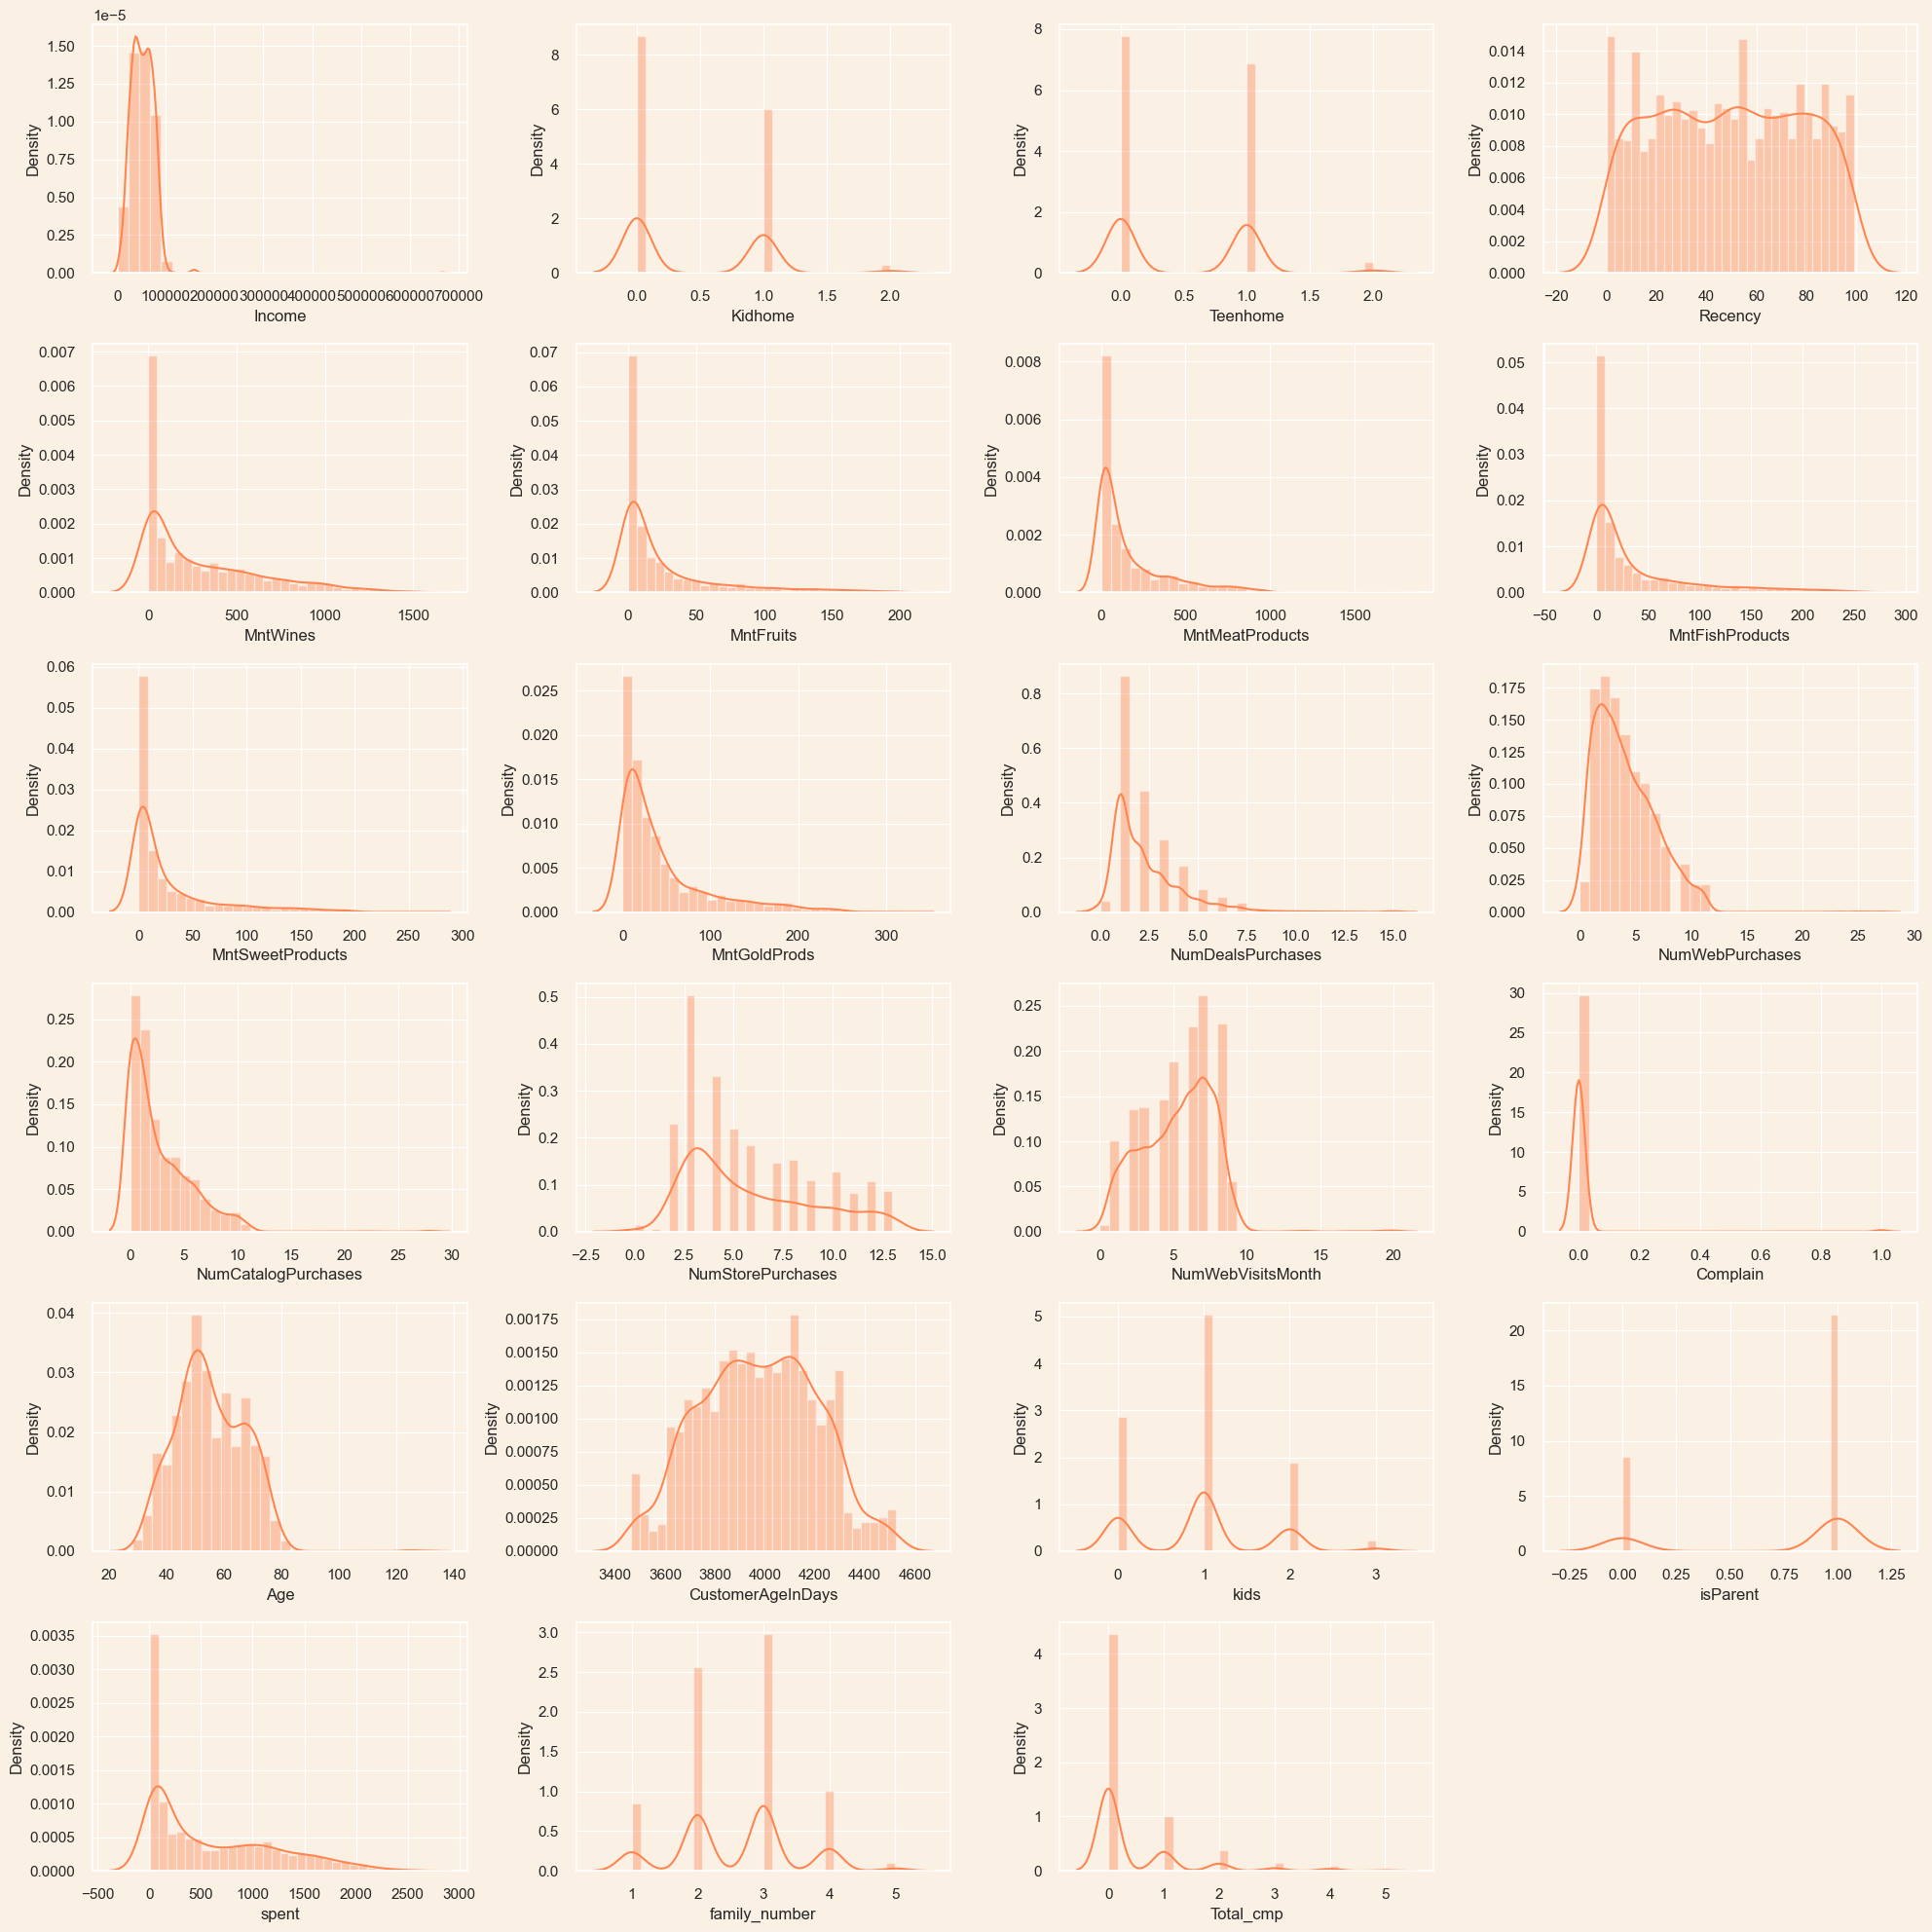

In [90]:
plt.figure(figsize=(20,20))

for i in range(0,len(num_data.columns)):

    plt.subplot(6,4,i+1)
    sns.distplot(x=num_data[num_data.columns[i]] , bins=30 , color="#FF8551")
    plt.xlabel(num_data.columns[i])
    plt.tight_layout()

sangat sedikit data yang mempunyai distribusi normal , mayoritas berdistribusi skew positif

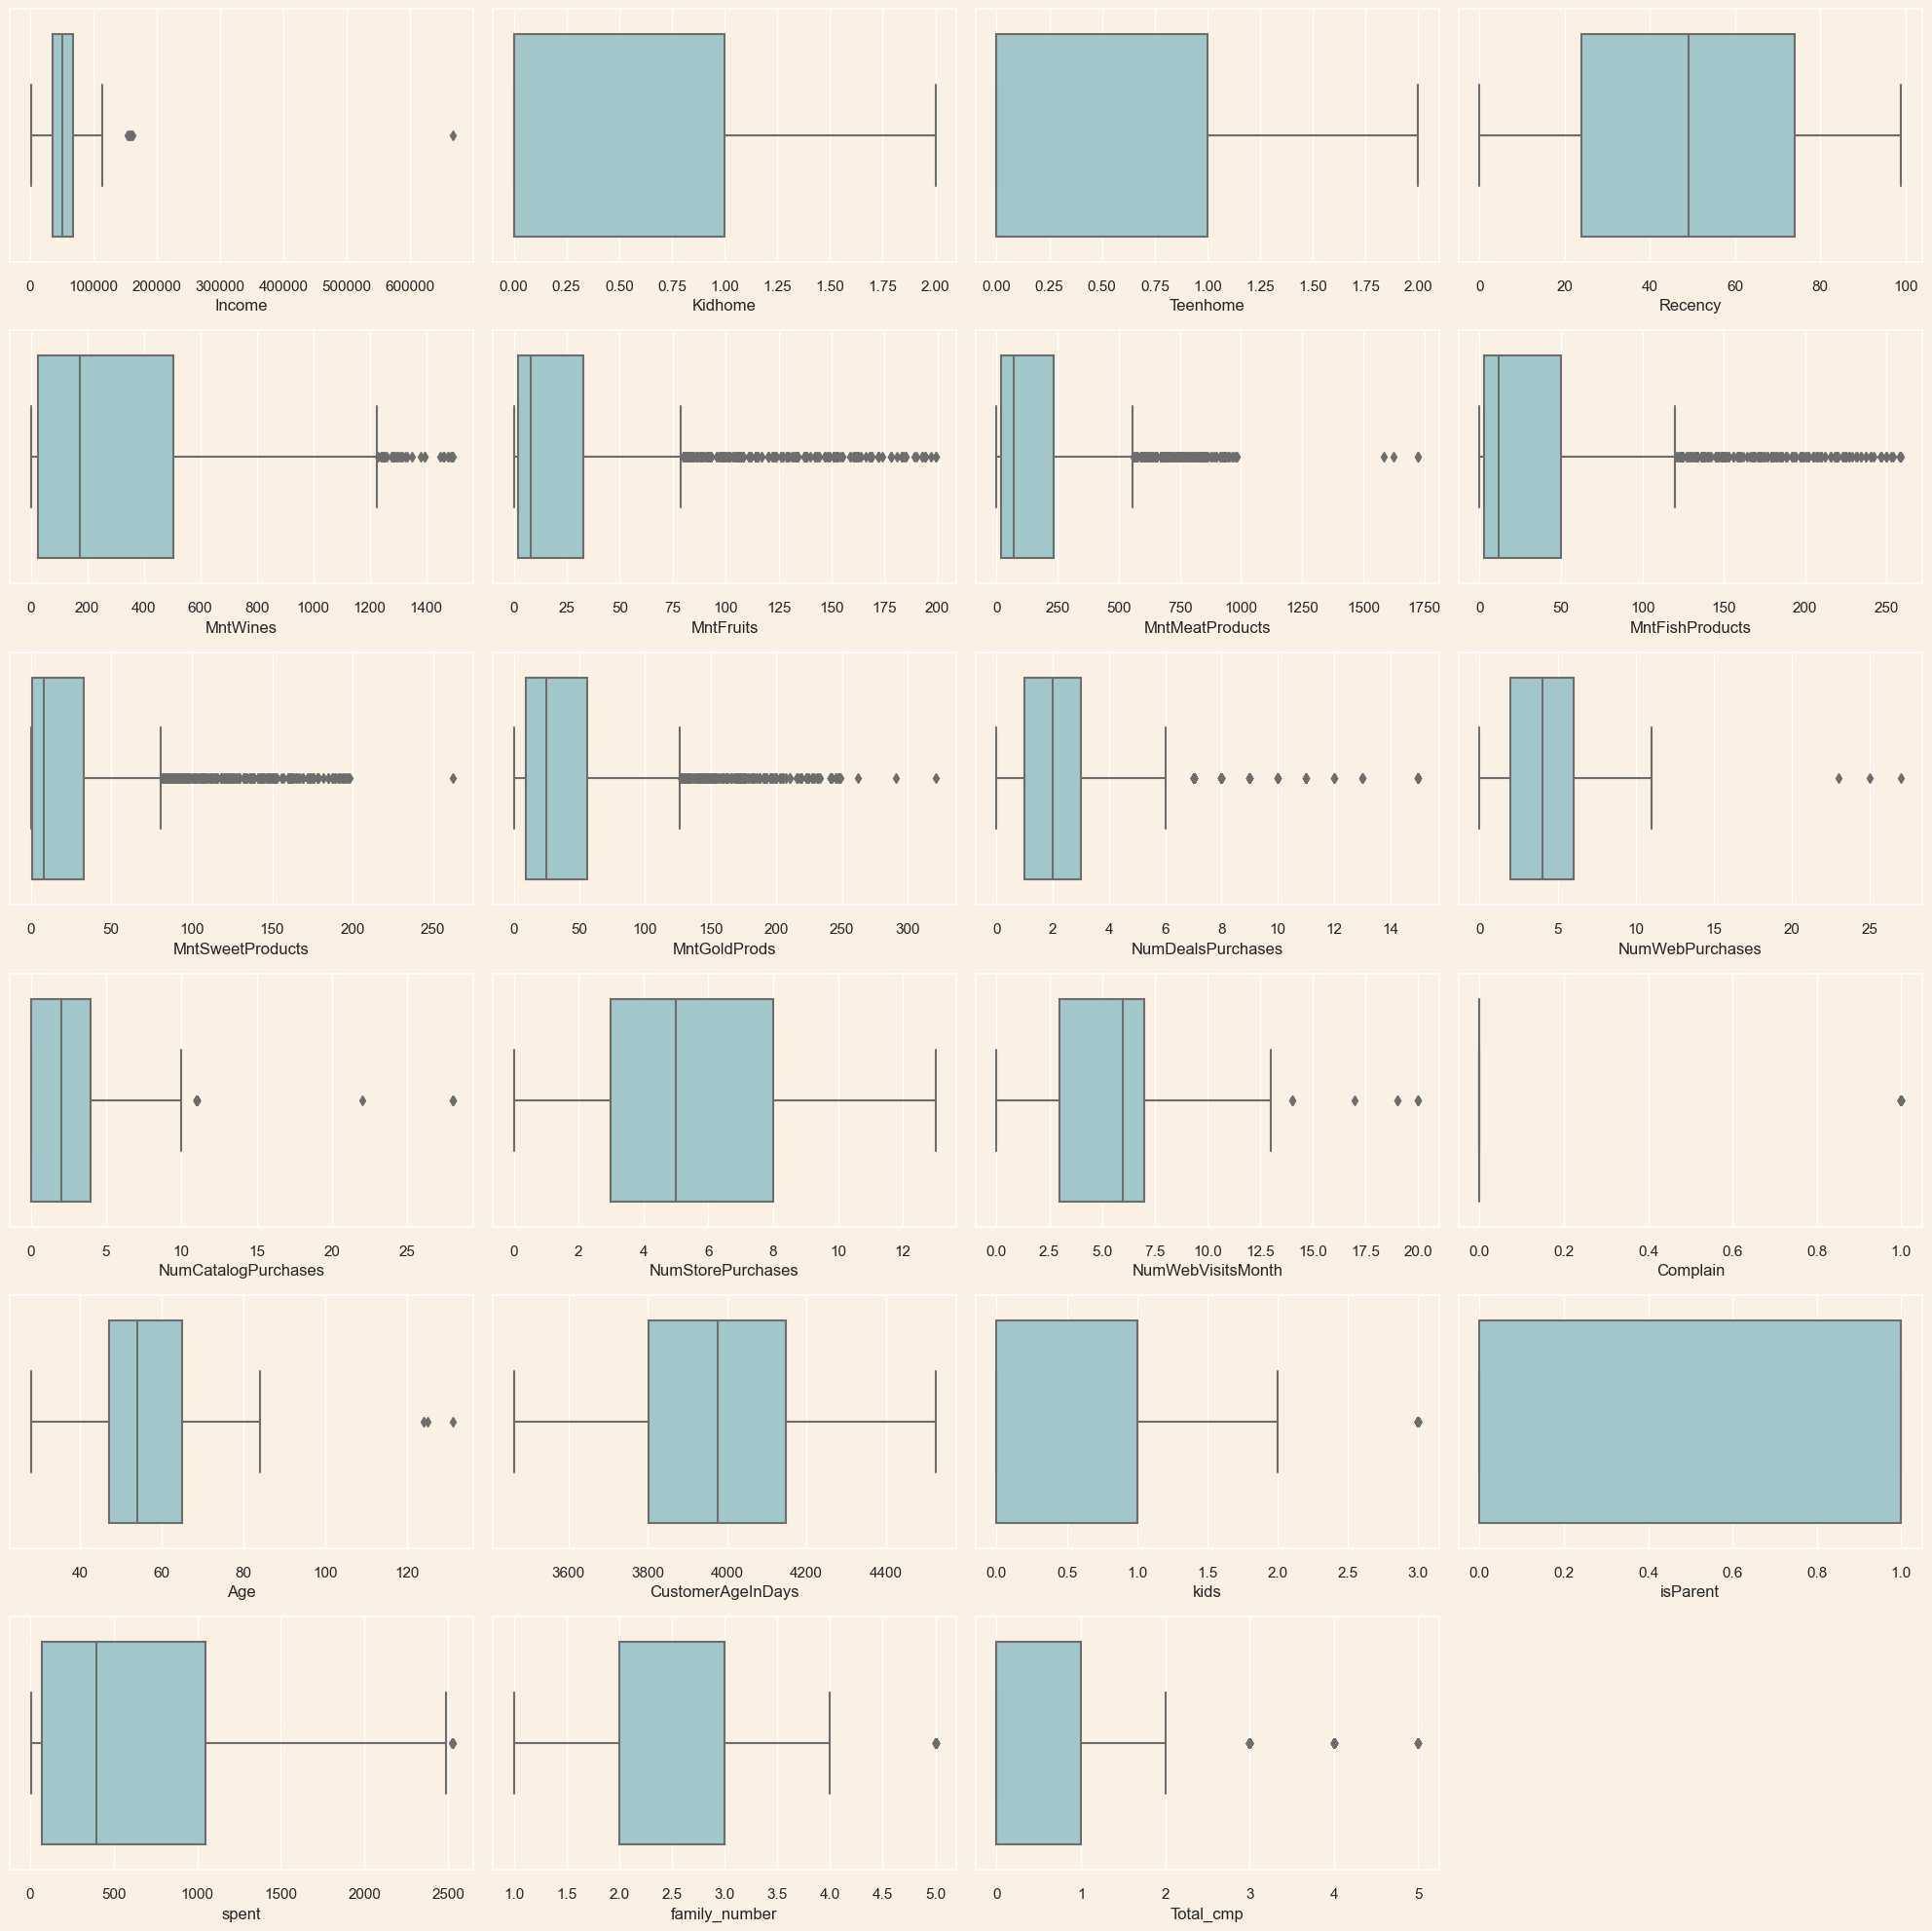

In [91]:
plt.figure(figsize=(20,20))

for i in range(0,len(num_data.columns)):

    plt.subplot(6,4,i+1)
    sns.boxplot(x=num_data[num_data.columns[i]]  , color="#9BCDD2")
    plt.xlabel(num_data.columns[i])
    plt.tight_layout()

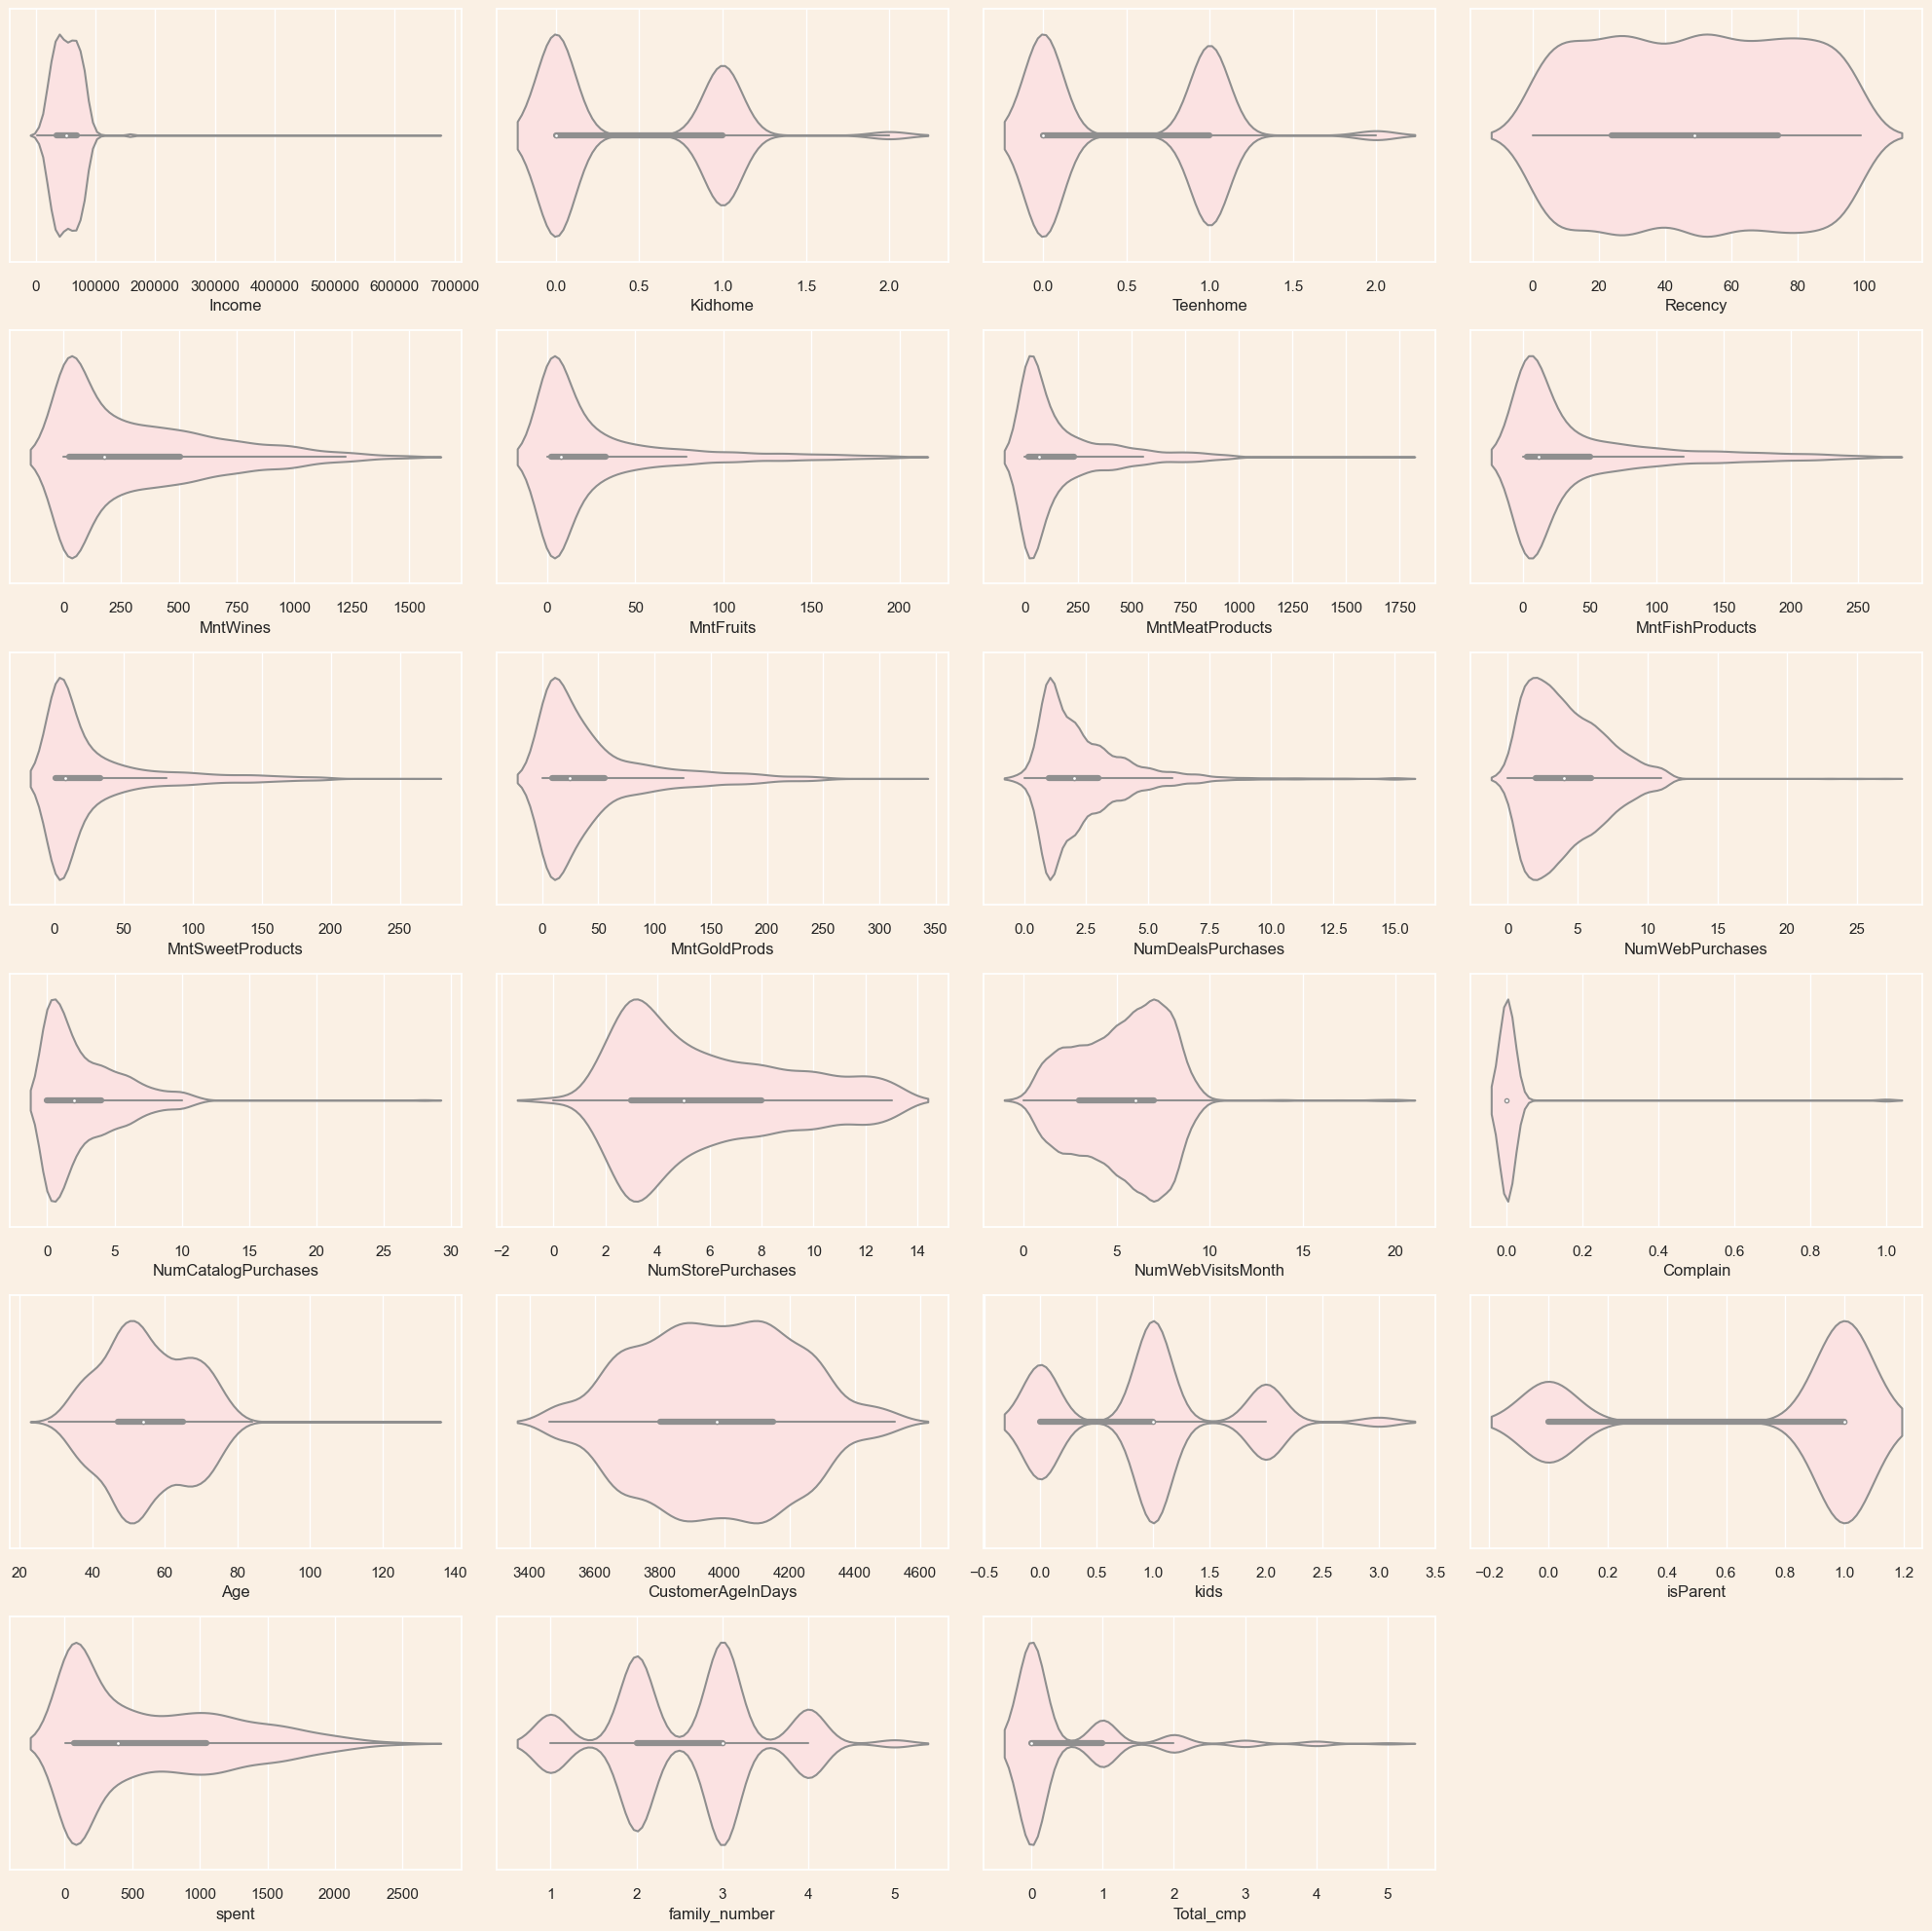

In [92]:
plt.figure(figsize=(20,20))

for i in range(0,len(num_data.columns)):

    plt.subplot(6,4,i+1)
    sns.violinplot(x=num_data[num_data.columns[i]]  , color="#FFDEDE")
    plt.xlabel(num_data.columns[i])
    plt.tight_layout()

Text(0.5, 1.0, 'Income  X  Spent')

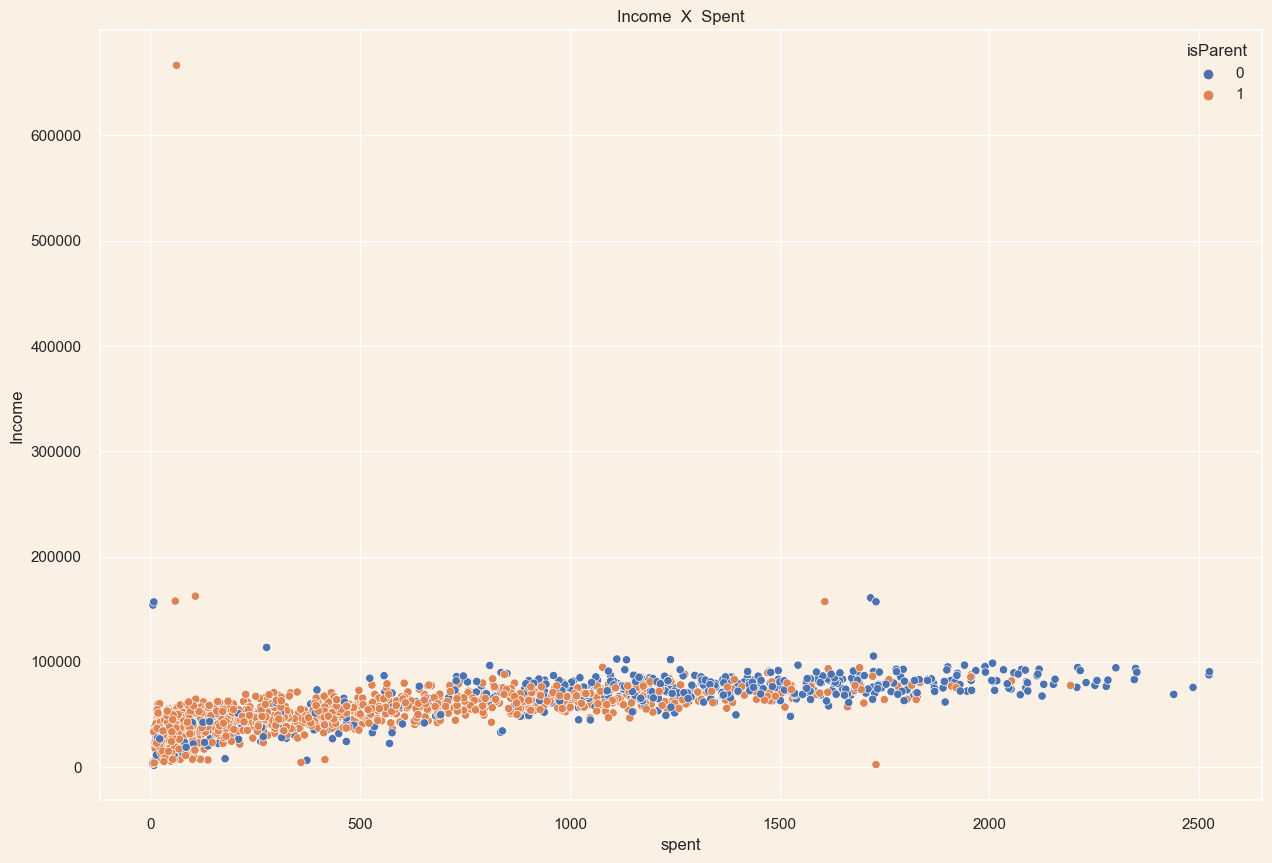

In [93]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=num_data , x=num_data["spent"] , y=num_data["Income"] , hue=num_data["isParent"])
plt.title("Income  X  Spent")

<Axes: xlabel='Age', ylabel='spent'>

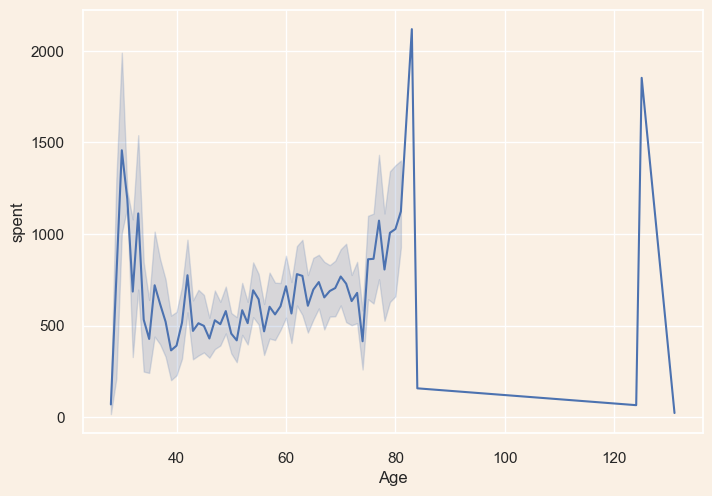

In [94]:
sns.lineplot(data=num_data , x=num_data["Age"] , y=num_data["spent"] )


## Outliner 

membuang outlier di variable Age dan Income

In [95]:
clear_dataset = dataset[np.logical_and(dataset["Age"] < 85 , dataset["Income"] < 600000)]

print("banyaknya data point sebelum menghilangkan outliner : " , len(dataset))
print("banyaknya data point setelah menghilangkan outliner : " , len(clear_dataset))

banyaknya data point sebelum menghilangkan outliner :  2216
banyaknya data point setelah menghilangkan outliner :  2212


In [96]:
clear_num_data = clear_dataset.select_dtypes(include=[int,float])
clear_cat_data = clear_dataset.select_dtypes(include=object)

korelasi variable Income dengan Spent adalah :  0.7927397698771241


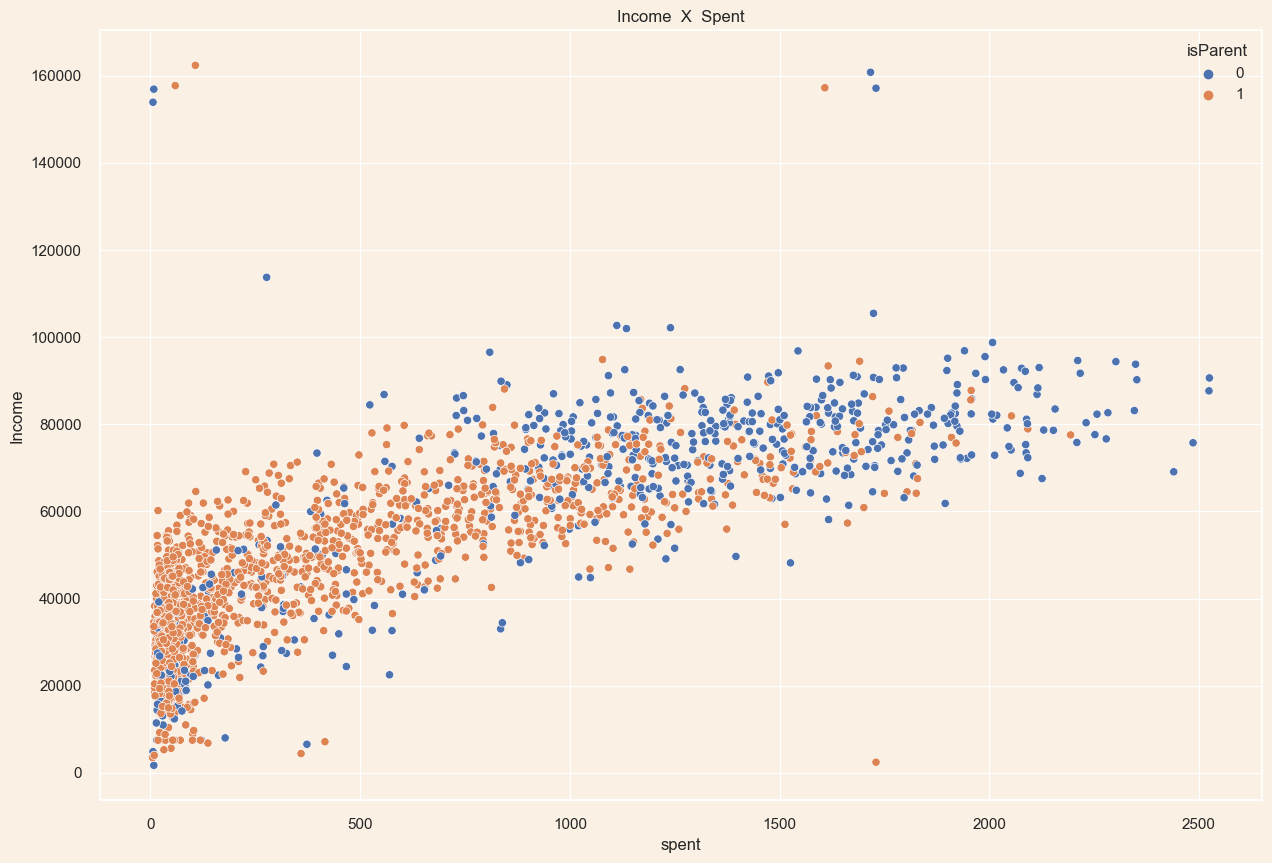

In [97]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=clear_num_data , x="spent" , y="Income" , hue="isParent")
plt.title("Income  X  Spent")

print("korelasi variable Income dengan Spent adalah : " , clear_num_data["Income"].corr(clear_num_data["spent"]))

korelasi variable Income dengan Spent adalah :  0.11590083664783475


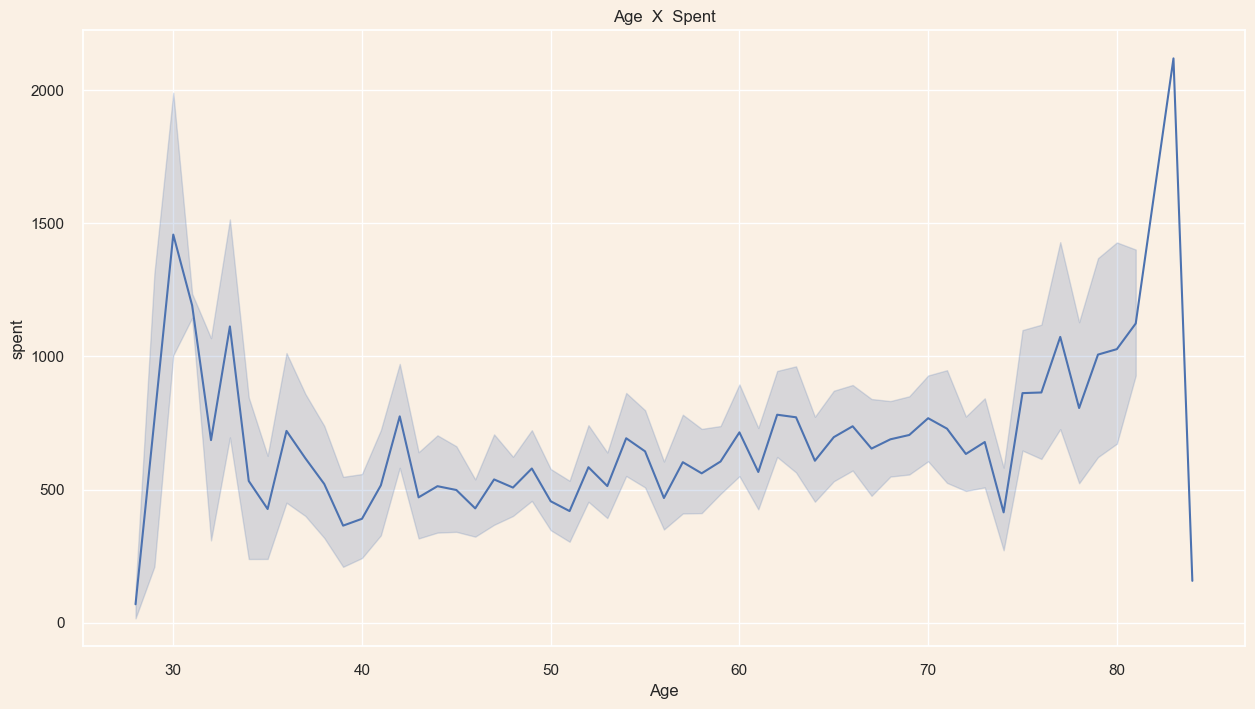

In [98]:
plt.figure(figsize=(15,8))

sns.lineplot(data=clear_num_data , x="Age" , y="spent" )
plt.title("Age  X  Spent")


print("korelasi variable Income dengan Spent adalah : " , clear_num_data["Age"].corr(clear_num_data["spent"]))

Text(0.5, 1.0, 'spent vs Isparent')

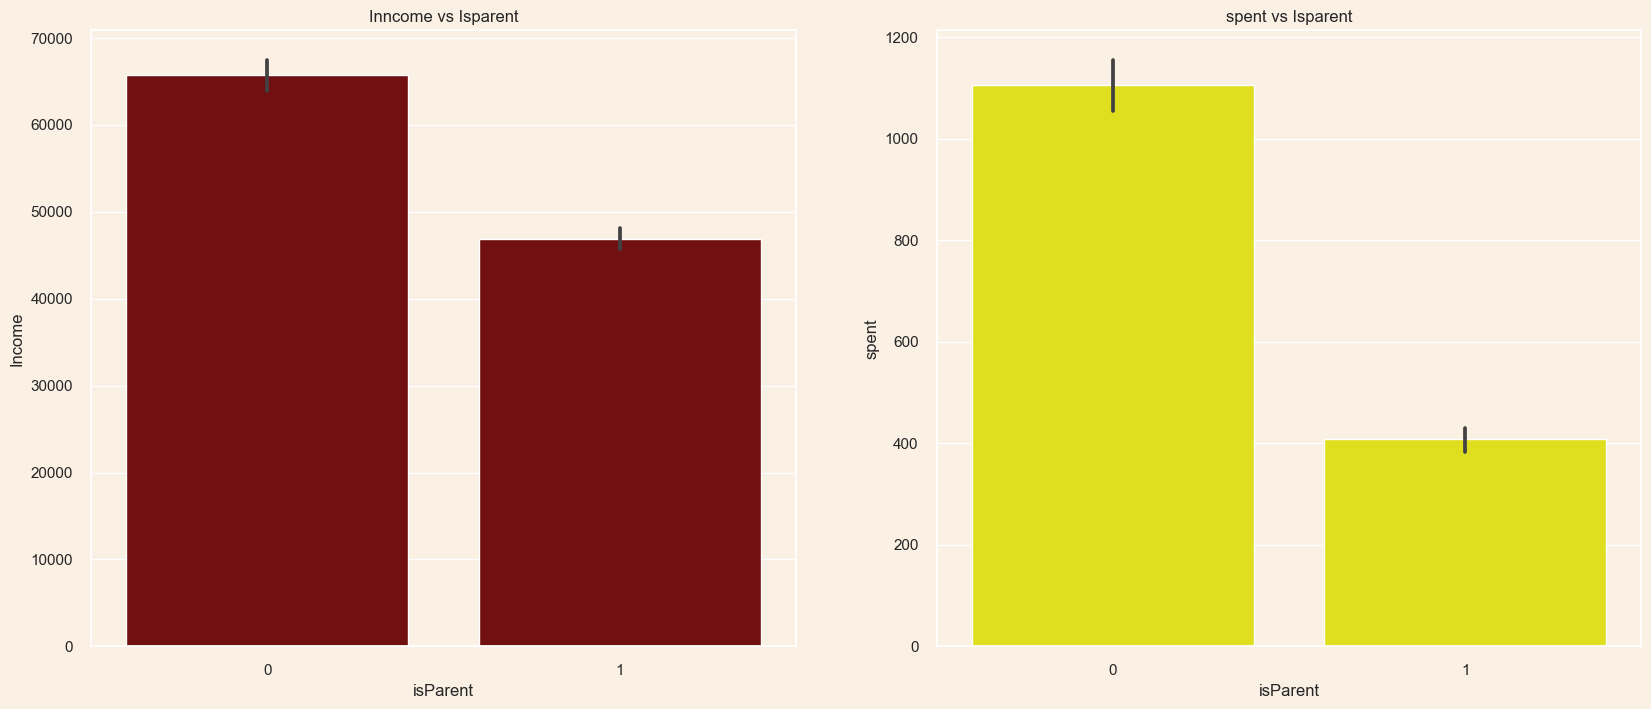

In [99]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data = num_data , x='isParent' , y="Income" , color="maroon")
plt.title("Inncome vs Isparent")

plt.subplot(1,2,2)
sns.barplot(data = num_data , x='isParent' , y="spent" , color="yellow")
plt.title("spent vs Isparent")


In [100]:
cat_data.head(3)

Education Marital_Status
0  Graduate         Single
1  Graduate         Single
2  Graduate        Partner

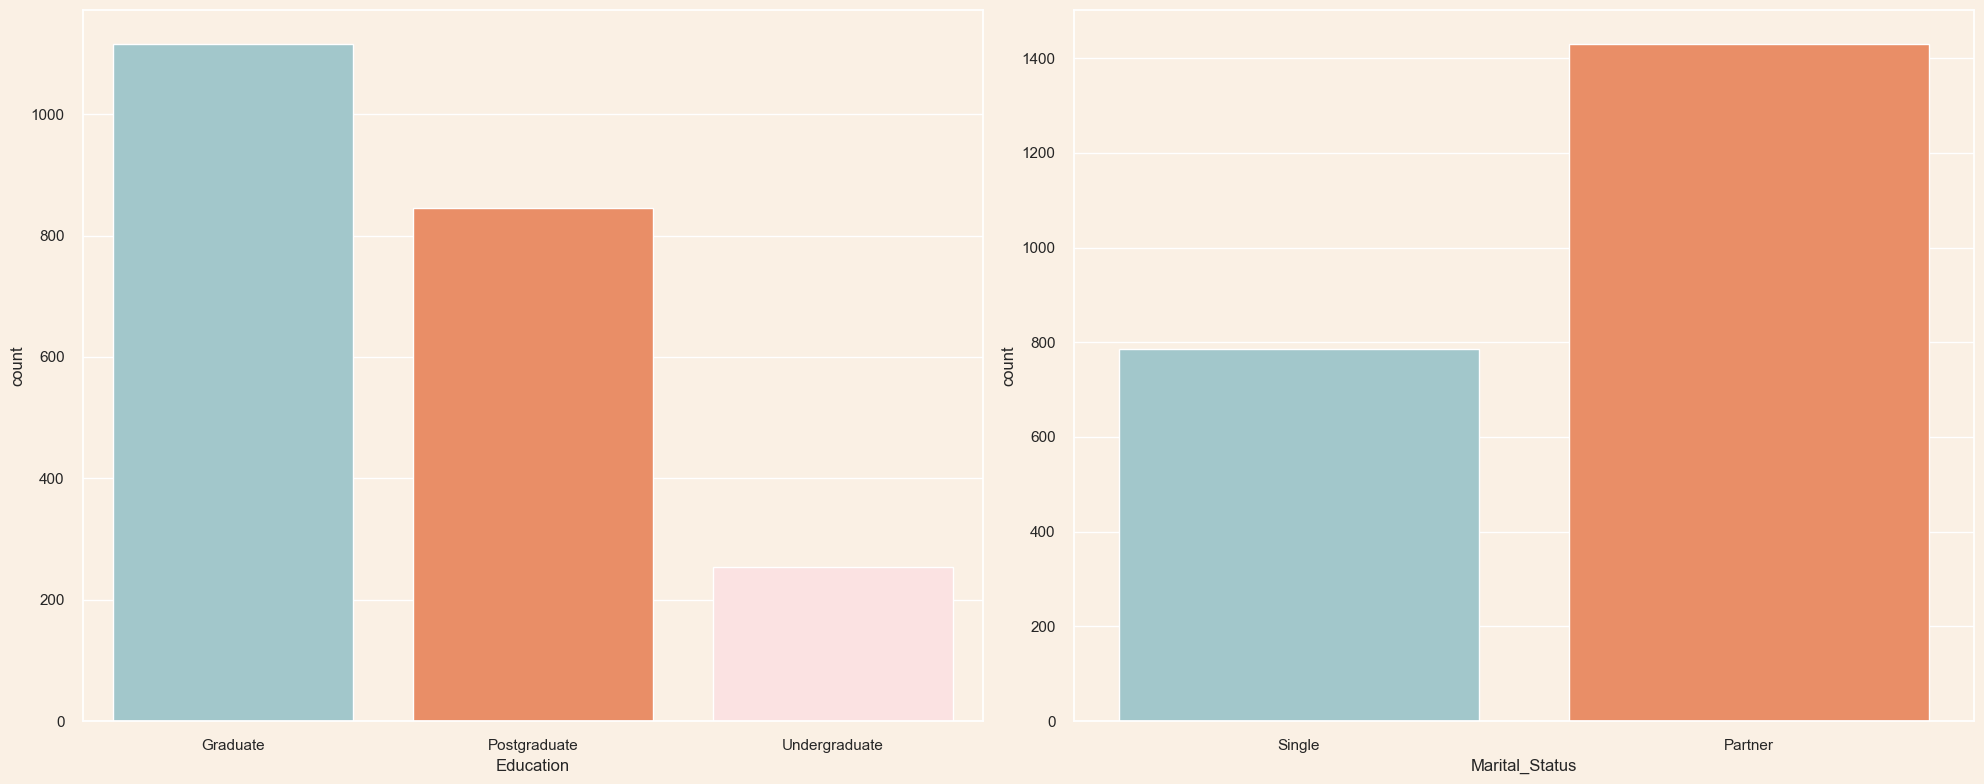

In [101]:
plt.figure(figsize=(20,8))

for i in range(0,len(cat_data.columns)):

    if i == 0 :
     
     plt.subplot(1,2,i+1)
     sns.countplot(x=cat_data[cat_data.columns[i]]  , palette=["#9BCDD2" ,"#FF8551" ,"#FFDEDE"])
     plt.xlabel(cat_data.columns[i])
     plt.tight_layout()
    else:
     plt.subplot(1,2,i+1)
     sns.countplot(x=cat_data[cat_data.columns[i]]  , palette=["#9BCDD2" ,"#FF8551"])
     plt.xlabel(cat_data.columns[i])
     plt.tight_layout()

In [102]:
clear_dataset.head(3)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduate         Single  58138.0        0         0       58       635   
1  Graduate         Single  46344.0        1         1       38        11   
2  Graduate        Partner  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   
2         49              127              111  ...                 10   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   
2                  4         0   59               3934     0         0    776   

   family_number  Total_cmp  
0              1          1  
1              3          0  
2              2          0  

[3 rows x 25 columns]

In [103]:
clear_dataset["Education"].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

In [104]:
mapping = {
    'Graduate' : 1,
    'Postgraduate'  : 2,
    'Undergraduate'  : 3  
}

temp_marital = np.where(clear_dataset["Marital_Status"] == "Single" , 0 , 1)
temp_educ = clear_dataset["Education"].map(mapping)


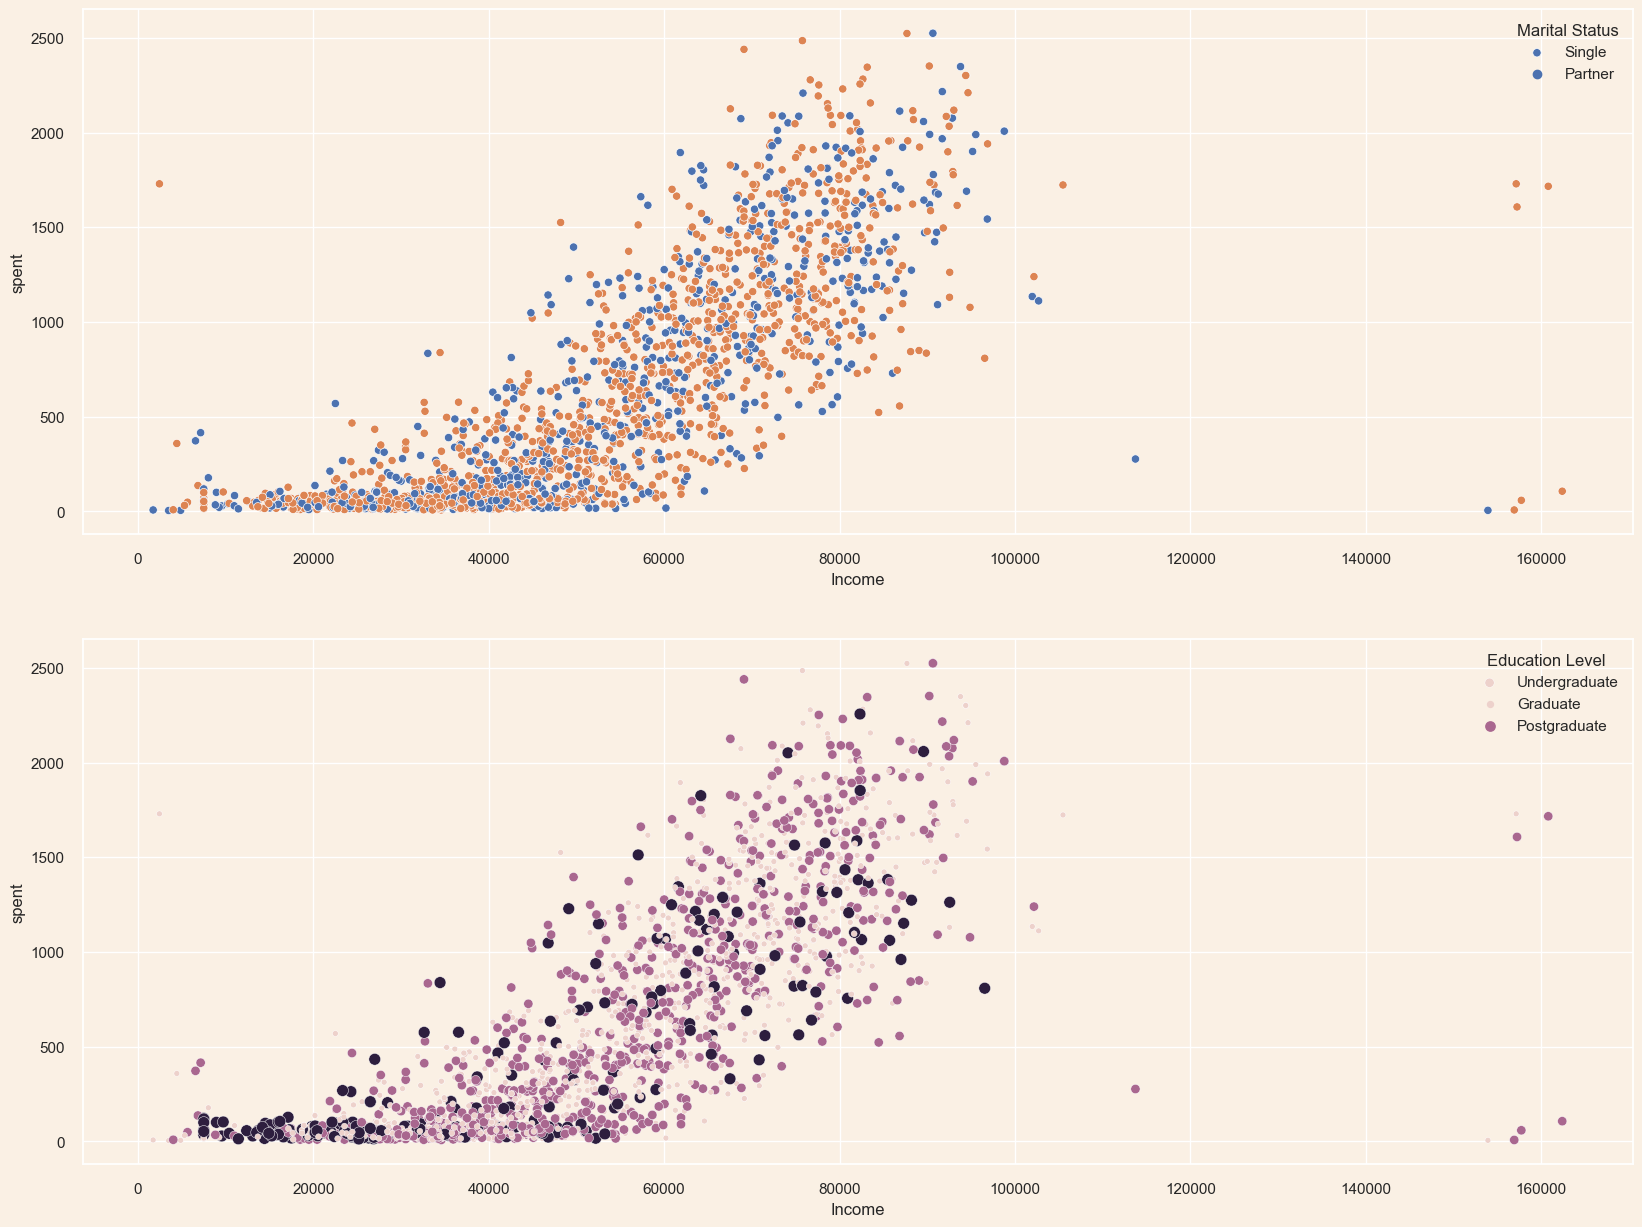

In [105]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.scatterplot(data=clear_dataset , x="Income" , y="spent" , hue=temp_marital)
plt.legend(title='Marital Status', labels=["Single" , "Partner"])

plt.subplot(2,1,2)
sns.scatterplot(data=clear_dataset , x="Income" , y="spent" , hue=temp_educ , size=temp_educ)
plt.legend(title='Education Level', labels=['Undergraduate', 'Graduate', 'Postgraduate'])


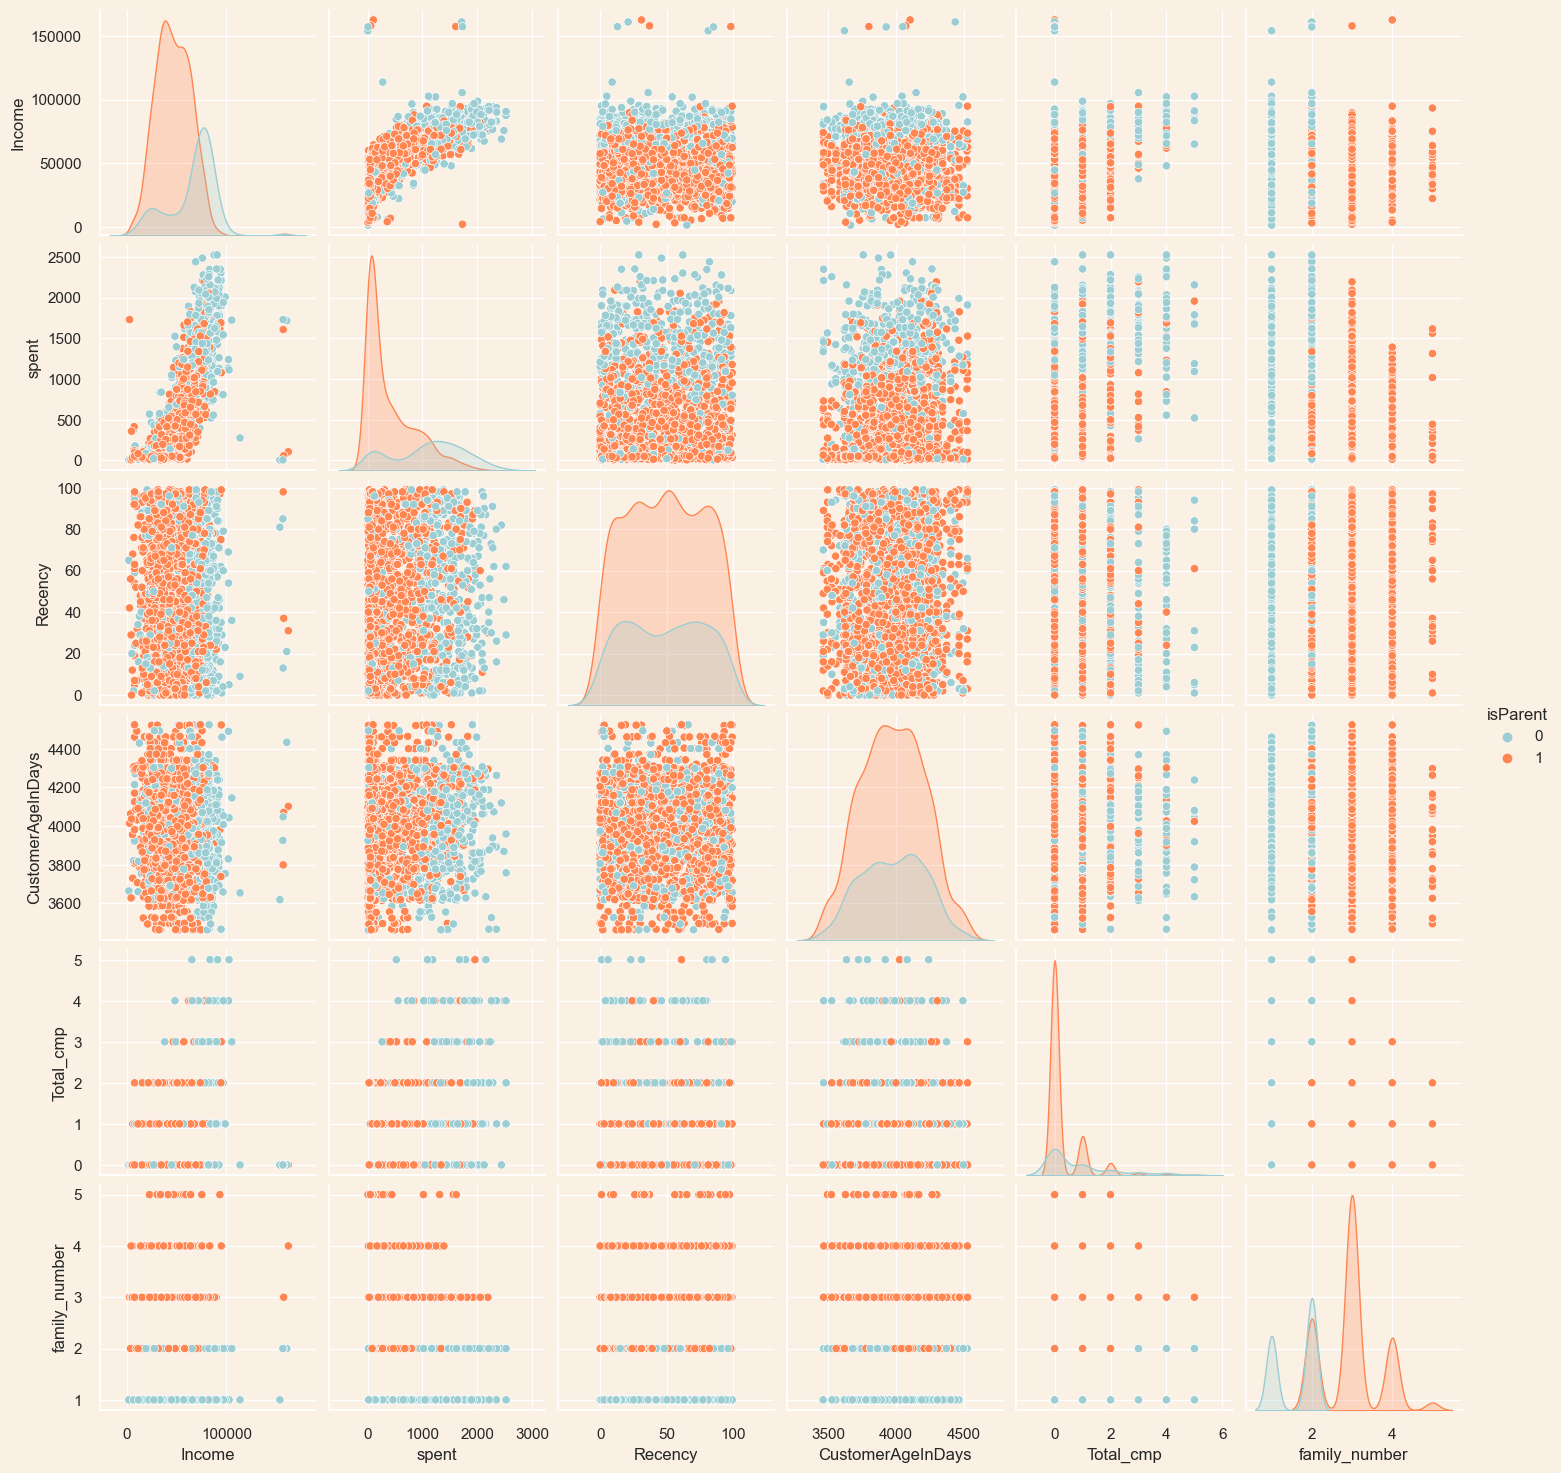

In [106]:
to_pair = ["Income" , "spent" , "Recency" , "CustomerAgeInDays" , "Total_cmp" , 'family_number' , "isParent"]

sns.pairplot(clear_dataset[to_pair] , hue="isParent" , palette=["#9BCDD2" ,"#FF8551"])

<Axes: >

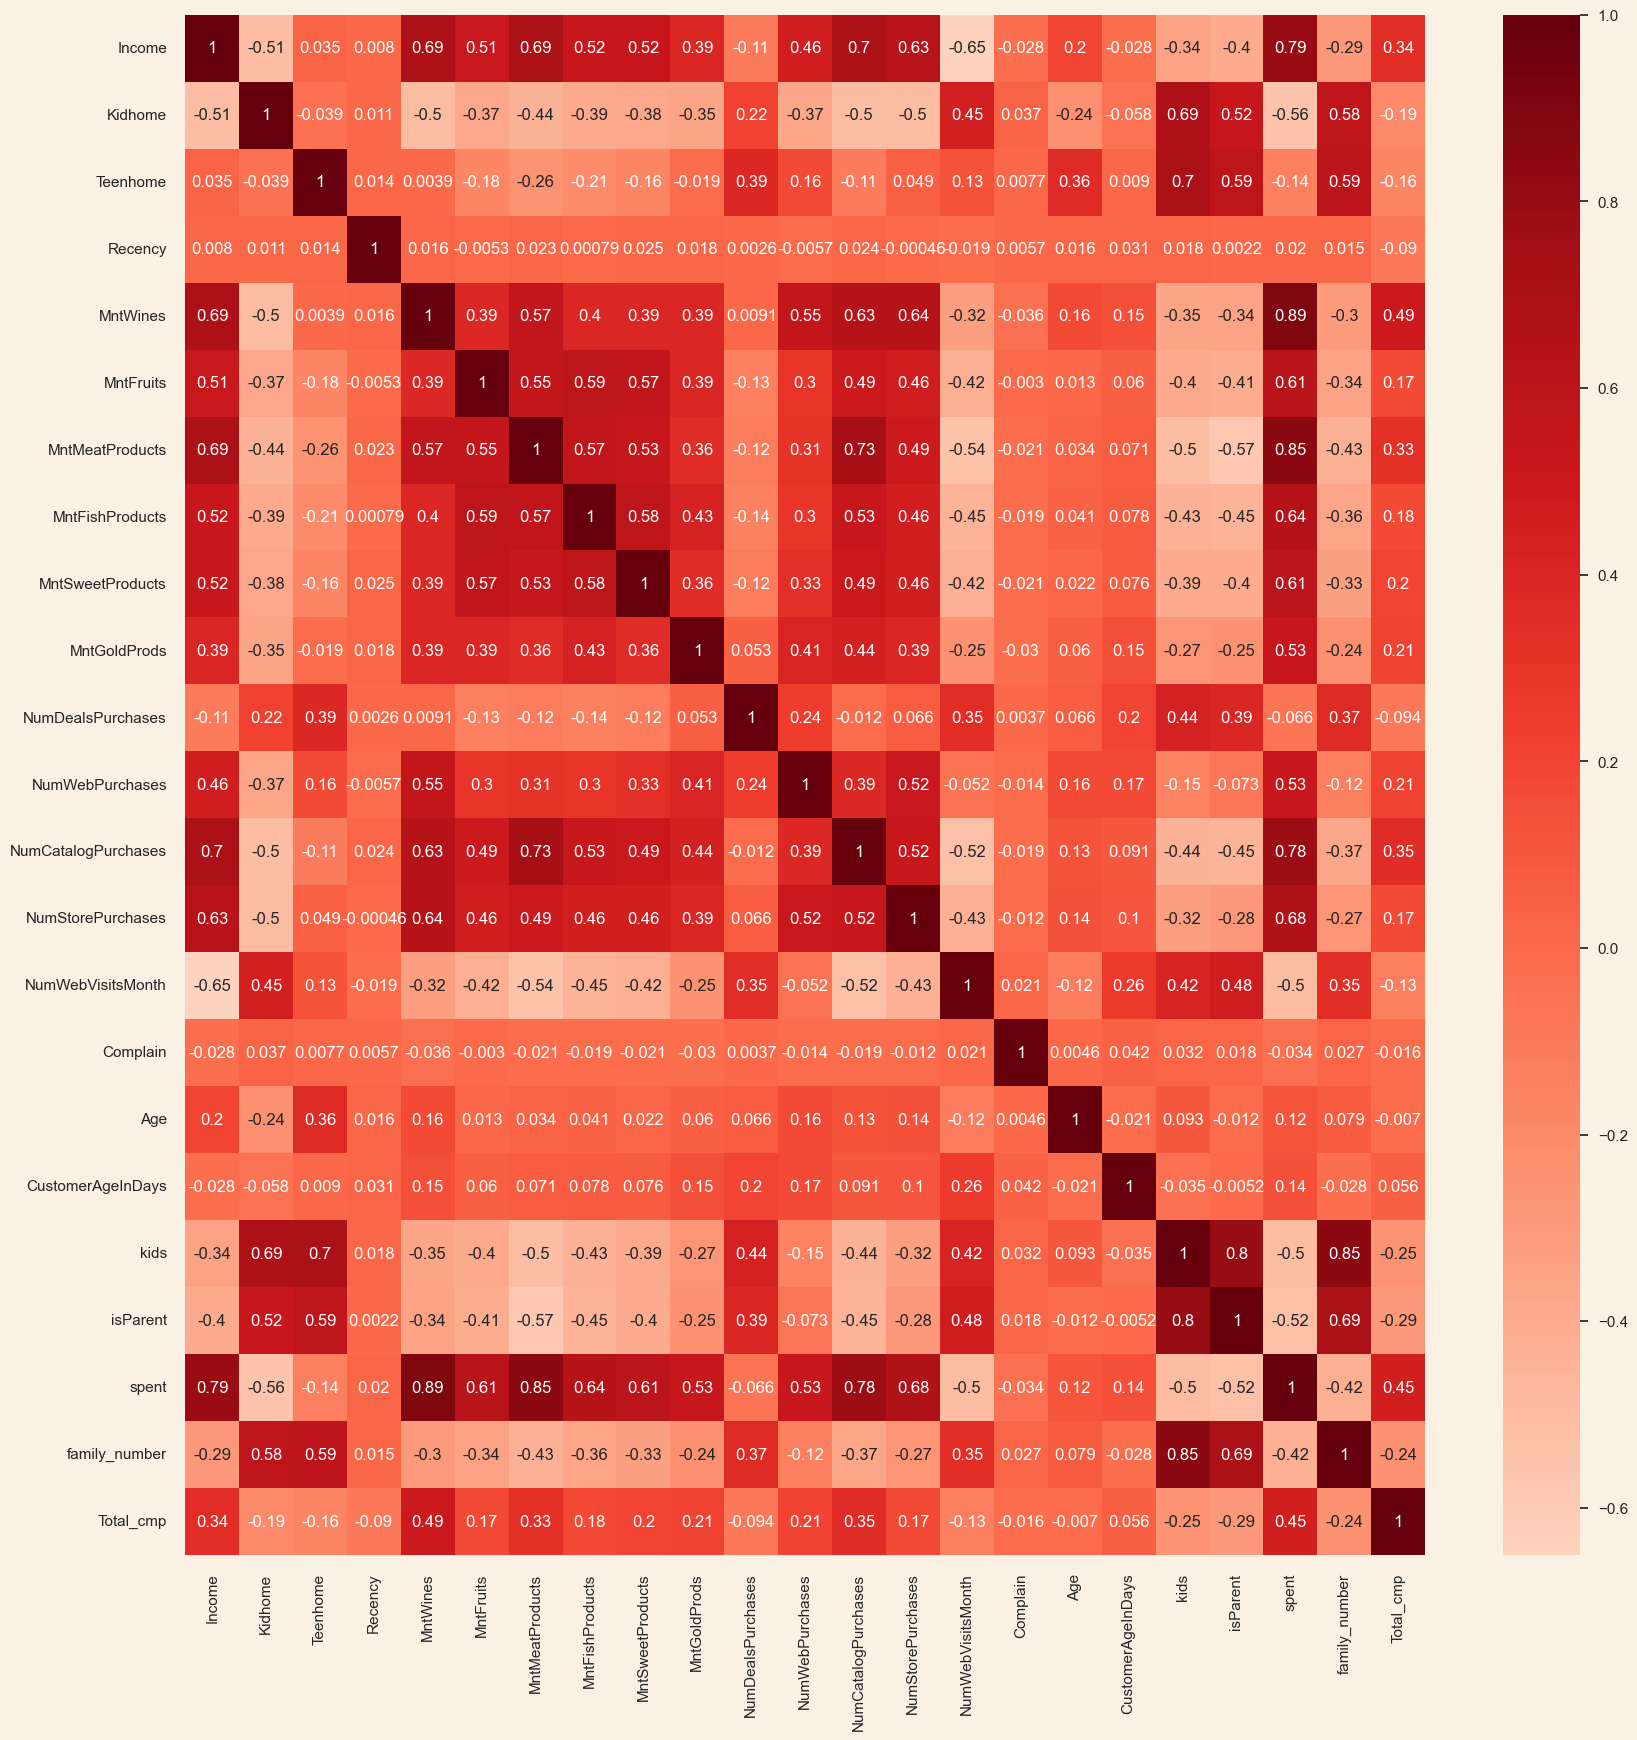

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(clear_dataset.corr() , annot=True ,center=0 ,cmap="Reds")

terdapat beberapa variable yang berkorelasi positif

# DIMENSION REDUCTION

## Scalling data

In [108]:
data_fix = clear_dataset.copy()

In [109]:
mapping = {
    'Graduate' : 1,
    'Postgraduate'  : 2,
    'Undergraduate'  : 3  
}

data_fix["Marital_Status"] = np.where(data_fix["Marital_Status"] == "Single" , 0 , 1)
data_fix["Education"] = data_fix["Education"].map(mapping)


In [110]:
data_fix.head(3)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   
2          1               1  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   
2         49              127              111  ...                 10   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   
2                  4         0   59               3934     0         0    776   

   family_number  Total_cmp  
0              1          1  
1              3          0  
2              2          0  

[3 rows x 25 columns]

In [111]:
scaller = StandardScaler()
data_scale = scaller.fit_transform(data_fix)

scale_dataset = pd.DataFrame(data=data_scale , columns=data_fix.columns)
scale_dataset

Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0     -0.893586       -1.349603  0.287105 -0.822754 -0.929699  0.310353   
1     -0.893586       -1.349603 -0.260882  1.040021  0.908097 -0.380813   
2     -0.893586        0.740959  0.913196 -0.822754 -0.929699 -0.795514   
3     -0.893586        0.740959 -1.176114  1.040021 -0.929699 -0.795514   
4      0.571657        0.740959  0.294307  1.040021 -0.929699  1.554453   
...         ...             ...       ...       ...       ...       ...   
2207  -0.893586        0.740959  0.430444 -0.822754  0.908097 -0.104347   
2208   0.571657        0.740959  0.560123  2.902796  0.908097  0.241237   
2209  -0.893586       -1.349603  0.233347 -0.822754 -0.929699  1.450778   
2210   0.571657        0.740959  0.803172 -0.822754  0.908097 -1.417564   
2211   0.571657        0.740959  0.042290  1.040021  0.908097 -0.311697   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     0.977660   1.552041         1.690293         2.453472  ...   
1    -0.872618  -0.637461        -0.718230        -0.651004  ...   
2     0.357935   0.570540        -0.178542         1.339513  ...   
3    -0.872618  -0.561961        -0.655787        -0.504911  ...   
4    -0.392257   0.419540        -0.218684         0.152508  ...   
...        ...        ...              ...              ...  ...   
2207  1.197084   0.419540         0.066770         0.079461  ...   
2208  0.298631  -0.662628        -0.611184        -0.687527  ...   
2209  1.787156   0.545373         0.222878        -0.103155  ...   
2210  0.363866   0.092373         0.209498         0.773403  ...   
2211 -0.656159  -0.587128        -0.472917        -0.651004  ...   

      NumStorePurchases  NumWebVisitsMonth  Complain       Age  \
0             -0.555814           0.692181  -0.09552  1.018352   
1             -1.171160          -0.132545  -0.09552  1.274785   
2              1.290224          -0.544908  -0.09552  0.334530   
3             -0.555814           0.279818  -0.09552 -1.289547   
4              0.059532          -0.132545  -0.09552 -1.033114   
...                 ...                ...       ...       ...   
2207          -0.555814          -0.132545  -0.09552  0.163575   
2208          -0.248141           0.692181  -0.09552  1.958607   
2209           2.213242           0.279818  -0.09552 -1.033114   
2210           1.290224          -0.957271  -0.09552  1.103830   
2211          -0.555814           0.692181  -0.09552  1.274785   

      CustomerAgeInDays      kids  isParent     spent  family_number  \
0              1.973583 -1.264598 -1.581139  1.676245      -1.758359   
1             -1.665144  1.404572  0.632456 -0.963297       0.449070   
2             -0.172664 -1.264598 -1.581139  0.280110      -0.654644   
3             -1.923210  0.069987  0.632456 -0.920135       0.449070   
4             -0.822130  0.069987  0.632456 -0.307562       0.449070   
...                 ...       ...       ...       ...            ...   
2207           0.124112  0.069987  0.632456  1.218061       0.449070   
2208          -1.940414  2.739158  0.632456 -0.271040       2.656499   
2209          -0.847936 -1.264598 -1.581139  1.052052      -1.758359   
2210          -0.843635  0.069987  0.632456  0.391336       0.449070   
2211           1.160676  1.404572  0.632456 -0.722584       1.552784   

      Total_cmp  
0      0.617244  
1     -0.502808  
2     -0.502808  
3     -0.502808  
4     -0.502808  
...         ...  
2207  -0.502808  
2208   0.617244  
2209   0.617244  
2210  -0.502808  
2211   0.617244  

[2212 rows x 25 columns]

### write scalled data

In [112]:
scale_dataset.to_csv("scaled_dataset.csv")

### write clear data

In [113]:
data_fix.to_csv("data_fix.csv" , index=False)

In [114]:
pca = PCA()
pca_data = pca.fit(scale_dataset)

memploting variance ratio 

Text(0.5, 1.0, 'Scree plot')

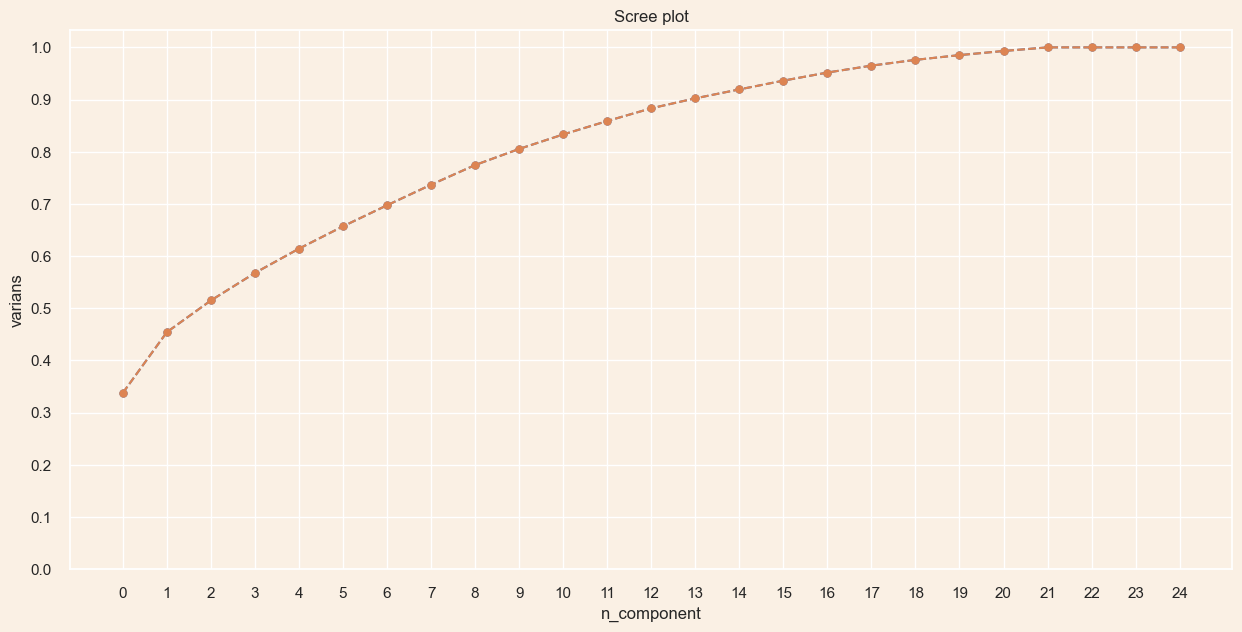

In [115]:
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca_data.explained_variance_ratio_), marker='o', linestyle='--')
plt.plot(np.cumsum(pca_data.explained_variance_ratio_), marker='o', linestyle='--')

plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("n_component")
plt.ylabel("varians")
plt.title("Scree plot")

In [116]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95)

print(f"jumlah variable yang mencapai lebih dari 95 % adalah : {n_components_95 + 1}")

jumlah variable yang mencapai lebih dari 95 % adalah : 17


In [117]:
cumulative_variance[17]

0.96502471602805

Text(0.5, 1.0, 'Scree plot')

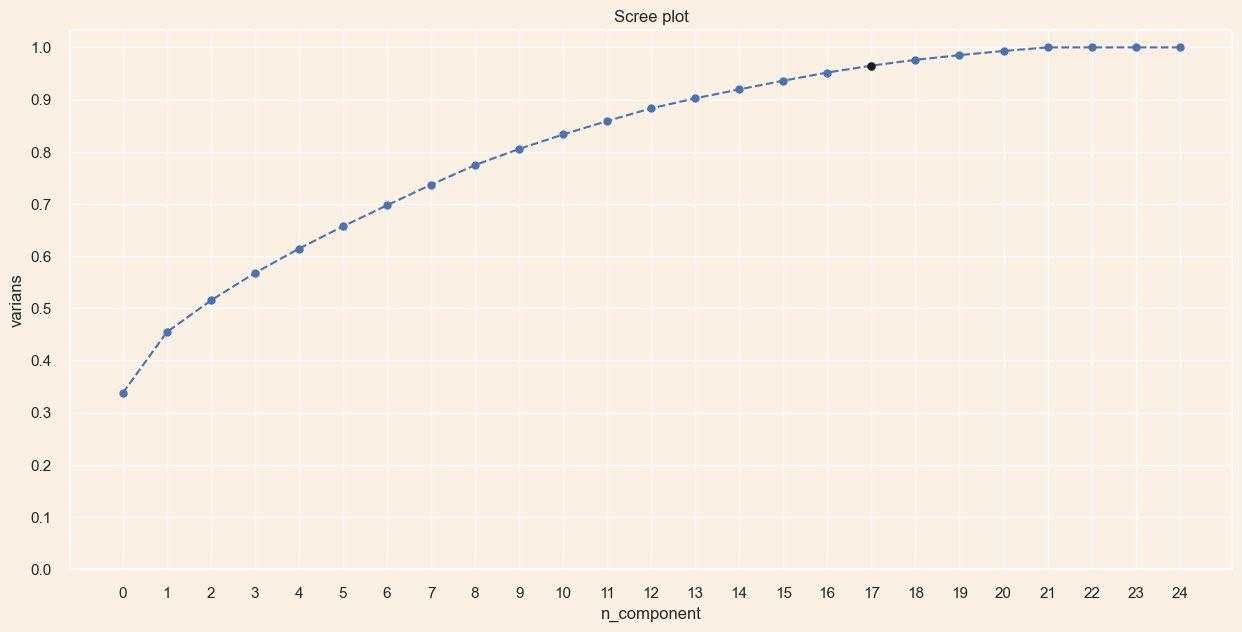

In [118]:
plt.figure(figsize=(15,7))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.plot(17 , cumulative_variance[17], "ko")

plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("n_component")
plt.ylabel("varians")
plt.title("Scree plot")

membuat data setelah di reduksi

In [119]:
dimension_reduction = PCA(n_components=17)
data_reduce = dimension_reduction.fit_transform(scale_dataset)

reduce_dataset = pd.DataFrame(data=data_reduce , columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17'])
reduce_dataset.head()

col1      col2      col3      col4      col5      col6      col7  \
0  5.036753 -0.152481  2.485446 -0.066397 -1.469459  0.040102  0.149090   
1 -2.927983 -0.007680 -1.815446 -1.493804 -0.717136 -1.779910  0.042636   
2  2.514897 -0.728468 -0.445736 -0.011280 -0.046994  0.733272  0.003730   
3 -2.719585 -1.542523 -0.877104  1.151528  0.266505 -1.200816 -0.228173   
4 -0.718288  0.206131 -0.168847  1.671012 -0.459761  0.222239 -0.526892   

       col8      col9     col10     col11     col12     col13     col14  \
0 -0.153402 -0.527247 -2.219843 -0.146096  0.682308  1.081322  0.366753   
1  0.011473  0.027416 -0.805104 -0.163304  0.423903  0.339550 -0.191830   
2  1.187022 -1.433140  0.879103  0.399634 -0.329291  0.914549 -1.092369   
3  0.520655 -0.700462  1.360571  0.266136  0.293375  0.543162 -0.112373   
4 -1.160448  1.105328  1.193175  0.480271  0.659677  0.978861  0.105809   

      col15     col16     col17  
0  0.071305  1.525321 -0.495906  
1  0.093661  0.146296  0.086098  
2  0.020987 -0.162557 -0.697486  
3 -0.032905 -0.059035 -0.240970  
4 -0.240516 -0.221543 -0.012273

### write reduce data

In [120]:
reduce_dataset.to_csv("reduce_dataset.csv")

menentukan n_cluster dengan elbow 

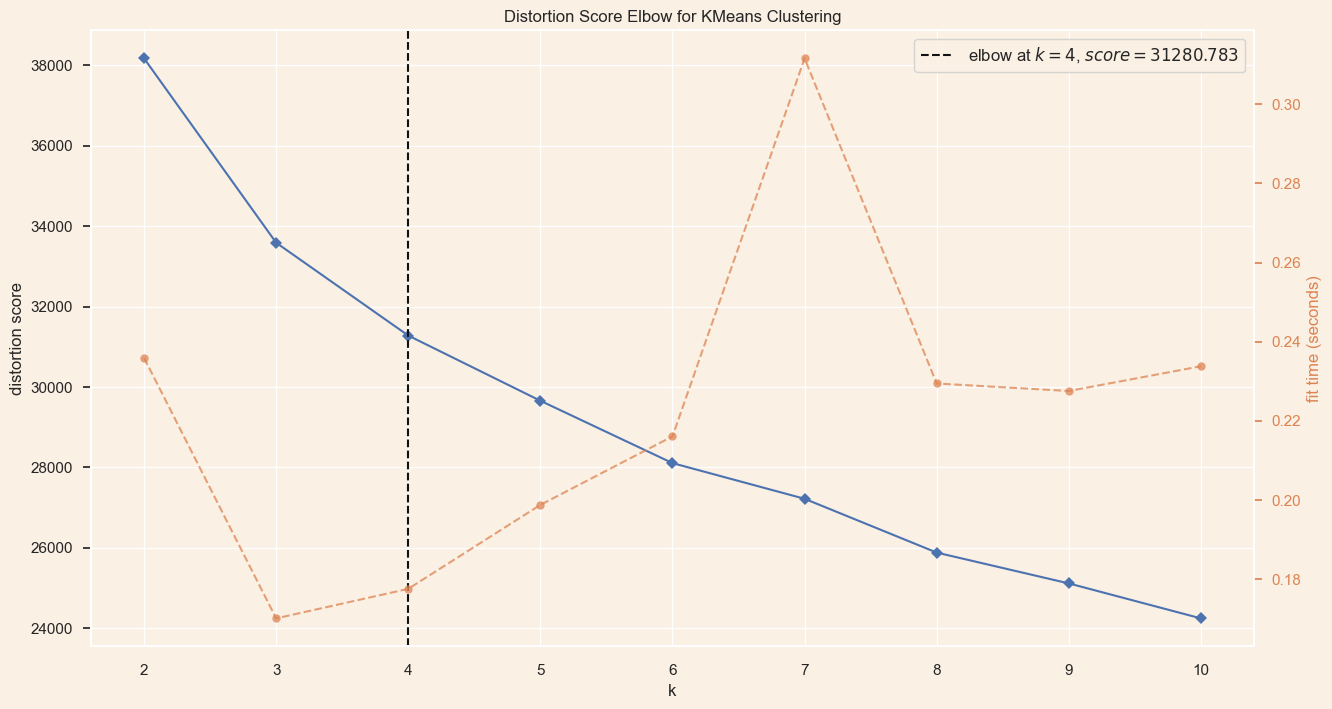

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
plt.figure(figsize=(15,8))
k_viz = KElbowVisualizer(KMeans(), k=10)
elbow = k_viz.fit(reduce_dataset)
elbow.show()

Inersia bukanlah metrik kinerja yang baik ketika mencoba memilih K. Karena nilainya terus menurun seiring dengan bertambahnya K. Memang, semakin banyak klaster, semakin dekat setiap instance dengan centroid terdekatnya, dan karenanya semakin rendah inersia. Teknik ini untuk memilih nilai terbaik untuk jumlah klaster cukup kasar.

Pendekatan yang lebih tepat (namun juga lebih mahal secara komputasi) adalah menggunakan skor siluet.

Skor siluet adalah metrik yang digunakan untuk mengevaluasi kualitas klaster dalam pembelajaran tanpa pengawasan, termasuk algoritma clustering seperti K-means. Skor ini memberikan ukuran seberapa mirip suatu objek dengan klasternya sendiri (koheisivitas) dibandingkan dengan klaster lainnya (separasi). Skor siluet berkisar dari -1 hingga 1, di mana skor siluet yang tinggi menunjukkan bahwa objek tersebut cocok dengan klasternya sendiri dan tidak cocok dengan klaster tetangga.

- Dekat dengan +1: Sampel jauh dari klaster tetangga, menunjukkan bahwa sampel tersebut dikelompokkan dengan baik.
- 0: Sampel berada di atau sangat dekat dengan batas keputusan antara dua klaster tetangga.
- Dekat dengan -1: Sampel mungkin ditempatkan pada klaster yang salah.

Jumlah klaster yang memaksimalkan skor siluet sering dianggap sebagai pilihan terbaik.

In [122]:
score_sil = []
for i in range(2 ,9 , 1):
    model = KMeans(n_clusters=i)
    model_fit = model.fit(data_reduce)
    score = silhouette_score(data_reduce , model_fit.labels_)
    score_sil.append(score)
    print(f"model dengan {i} cluster , mendapatkan score silhouette : {score}")

model dengan 2 cluster , mendapatkan score silhouette : 0.27430416142684544
model dengan 3 cluster , mendapatkan score silhouette : 0.20852263327983706
model dengan 4 cluster , mendapatkan score silhouette : 0.15136743350287155
model dengan 5 cluster , mendapatkan score silhouette : 0.16015094685455994
model dengan 6 cluster , mendapatkan score silhouette : 0.15461409134524248
model dengan 7 cluster , mendapatkan score silhouette : 0.14436509786007828
model dengan 8 cluster , mendapatkan score silhouette : 0.14389947654666294


Silhouette score untuk  2  kelompok merupakan yang tertinggi (0.274)

Silhouette score untuk 5  kelompok  adalah (0.151) 

kita akan mencoba untuk memploting nilai silhouette setiap jumlah kelompok : 

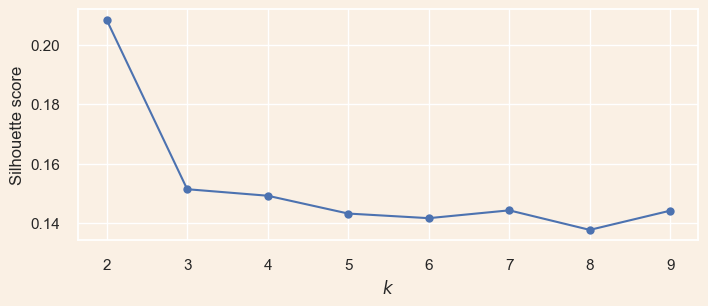

In [123]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(data_reduce)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(data_reduce, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

# Cluster 2

mencoba dengan n_cluster = 2

In [124]:
data2 = pd.read_csv("data_fix.csv")
data2

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0             1               0  58138.0        0         0       58   
1             1               0  46344.0        1         1       38   
2             1               1  71613.0        0         0       26   
3             1               1  26646.0        1         0       26   
4             2               1  58293.0        1         0       94   
...         ...             ...      ...      ...       ...      ...   
2207          1               1  61223.0        0         1       46   
2208          2               1  64014.0        2         1       56   
2209          1               0  56981.0        0         0       91   
2210          2               1  69245.0        0         1        8   
2211          2               1  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2207       709         43              182               42  ...   
2208       406          0               30                0  ...   
2209       908         48              217               32  ...   
2210       428         30              214               80  ...   
2211        84          3               61                2  ...   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  \
0                     4                  7         0   67               4433   
1                     2                  5         0   70               3587   
2                    10                  4         0   59               3934   
3                     4                  6         0   40               3527   
4                     6                  5         0   43               3783   
...                 ...                ...       ...  ...                ...   
2207                  4                  5         0   57               4003   
2208                  5                  7         0   78               3523   
2209                 13                  6         0   43               3777   
2210                 10                  3         0   68               3778   
2211                  4                  7         0   70               4244   

      kids  isParent  spent  family_number  Total_cmp  
0        0         0   1617              1          1  
1        2         1     27              3          0  
2        0         0    776              2          0  
3        1         1     53              3          0  
4        1         1    422              3          0  
...    ...       ...    ...            ...        ...  
2207     1         1   1341              3          0  
2208     3         1    444              5          1  
2209     0         0   1241              1          1  
2210     1         1    843              3          0  
2211     2         1    172              4          1  

[2212 rows x 25 columns]

In [125]:
model_2 = KMeans(n_clusters=2)
pred_cluster_2 = model_2.fit_predict(data2)
data2["Cluster"] = pred_cluster_2 

In [126]:
data2.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   
2          1               1  71613.0        0         0       26       426   
3          1               1  26646.0        1         0       26        11   
4          2               1  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0         88              546              172  ...                  7   
1          1                6                2  ...                  5   
2         49              127              111  ...                  4   
3          4               20               10  ...                  6   
4         43              118               46  ...                  5   

   Complain  Age  CustomerAgeInDays  kids  isParent  spent  family_number  \
0         0   67               4433     0         0   1617              1   
1         0   70               3587     2         1     27              3   
2         0   59               3934     0         0    776              2   
3         0   40               3527     1         1     53              3   
4         0   43               3783     1         1    422              3   

   Total_cmp  Cluster  
0          1        1  
1          0        0  
2          0        1  
3          0        0  
4          0        1  

[5 rows x 26 columns]

In [127]:
data2.to_csv("cluster_data_n2.csv" , index=False)

In [128]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)
si = pd.DataFrame(data=scale_data)
si.head(3)

0         1         2         3         4         5         6   \
0 -0.893586 -1.349603  0.287105 -0.822754 -0.929699  0.310353  0.977660   
1 -0.893586 -1.349603 -0.260882  1.040021  0.908097 -0.380813 -0.872618   
2 -0.893586  0.740959  0.913196 -0.822754 -0.929699 -0.795514  0.357935   

         7         8         9   ...        16       17        18        19  \
0  1.552041  1.690293  2.453472  ...  0.692181 -0.09552  1.018352  1.973583   
1 -0.637461 -0.718230 -0.651004  ... -0.132545 -0.09552  1.274785 -1.665144   
2  0.570540 -0.178542  1.339513  ... -0.544908 -0.09552  0.334530 -0.172664   

         20        21        22        23        24        25  
0 -1.264598 -1.581139  1.676245 -1.758359  0.617244  1.027503  
1  1.404572  0.632456 -0.963297  0.449070 -0.502808 -0.973233  
2 -1.264598 -1.581139  0.280110 -0.654644 -0.502808  1.027503  

[3 rows x 26 columns]

In [129]:
pca = PCA(n_components=2)
reduce2 = pca.fit_transform(si)
cluster2_data = pd.DataFrame(data=reduce2 , columns=["col1" , "col2"])
cluster2_data["Cluster"] = data2["Cluster"]
cluster2_data.head()

col1      col2  Cluster
0  5.092613 -0.430279        1
1 -3.067038  0.077250        0
2  2.684731 -0.695109        1
3 -2.906544 -1.464080        0
4 -0.413627  0.451656        1

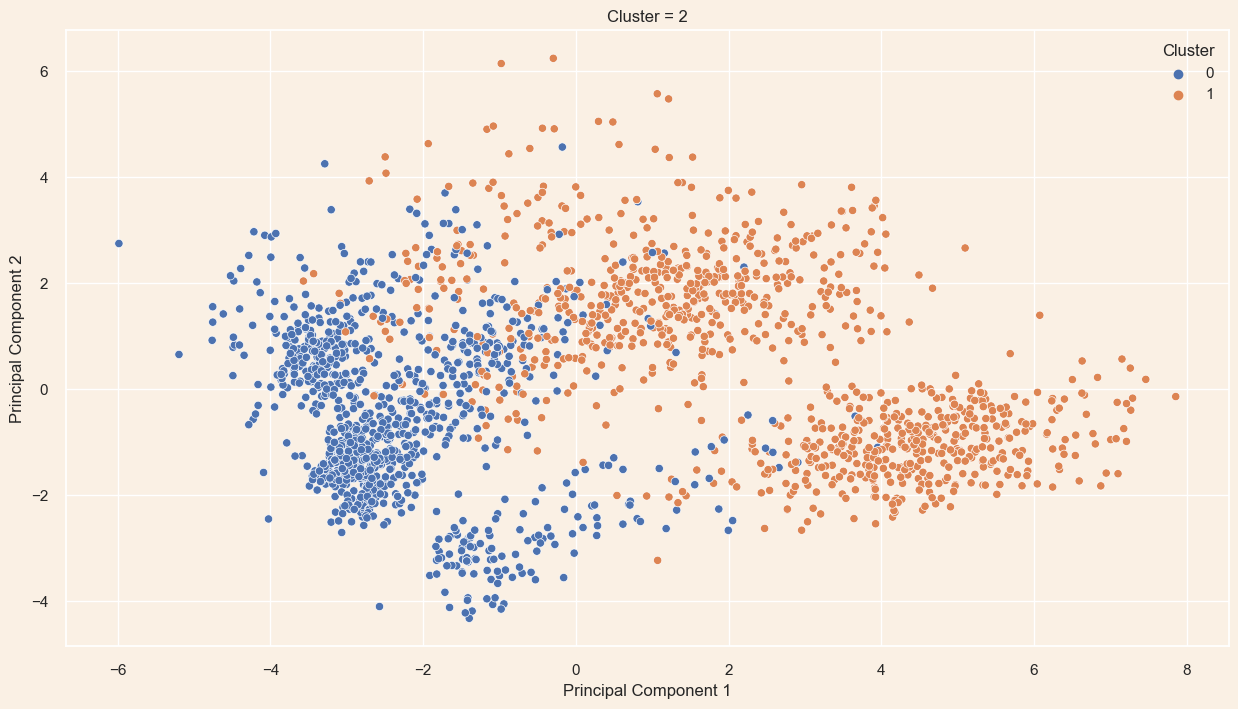

In [130]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cluster2_data , x="col1" , y="col2" , hue="Cluster")

plt.title("Cluster = 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



In [131]:
pca = PCA(n_components=3)
reduce2 = pca.fit_transform(si)
cluster2_data = pd.DataFrame(data=reduce2 , columns=["col1" , "col2" , "col3"])
cluster2_data["Cluster"] = data2["Cluster"]
cluster2_data.head()

col1      col2      col3  Cluster
0  5.092610 -0.430336  2.620742        1
1 -3.067039  0.077133 -1.811564        0
2  2.684732 -0.695374 -0.514293        1
3 -2.906545 -1.463958 -0.928949        0
4 -0.413625  0.451563 -0.317429        1

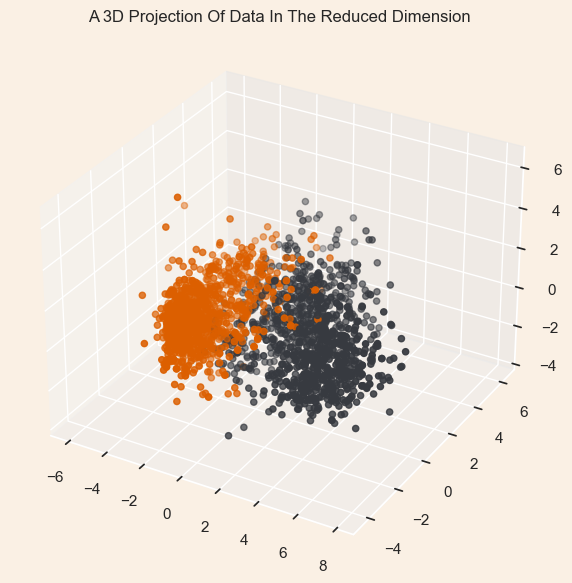

In [132]:
cmap_2 = colors.ListedColormap(['#DC5F00'   , "#373A40"])

x =cluster2_data["col1"]
y =cluster2_data["col2"]
z =cluster2_data["col3"]
#To plot

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=cluster2_data["Cluster"], marker="o" , cmap = cmap_2 )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Cluster 3

In [133]:
data3 = pd.read_csv("data_fix.csv")
data3.head(2)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   

   family_number  Total_cmp  
0              1          1  
1              3          0  

[2 rows x 25 columns]

In [134]:
model_3 = KMeans(n_clusters=3)
pred_cluster_3 = model_3.fit_predict(data3)
data3["Cluster"] = pred_cluster_3

In [135]:
data3.head(3)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   
2          1               1  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0         88              546              172  ...                  7   
1          1                6                2  ...                  5   
2         49              127              111  ...                  4   

   Complain  Age  CustomerAgeInDays  kids  isParent  spent  family_number  \
0         0   67               4433     0         0   1617              1   
1         0   70               3587     2         1     27              3   
2         0   59               3934     0         0    776              2   

   Total_cmp  Cluster  
0          1        0  
1          0        0  
2          0        1  

[3 rows x 26 columns]

In [136]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data3)
si = pd.DataFrame(data=scale_data)
si.head(3)

0         1         2         3         4         5         6   \
0 -0.893586 -1.349603  0.287105 -0.822754 -0.929699  0.310353  0.977660   
1 -0.893586 -1.349603 -0.260882  1.040021  0.908097 -0.380813 -0.872618   
2 -0.893586  0.740959  0.913196 -0.822754 -0.929699 -0.795514  0.357935   

         7         8         9   ...        16       17        18        19  \
0  1.552041  1.690293  2.453472  ...  0.692181 -0.09552  1.018352  1.973583   
1 -0.637461 -0.718230 -0.651004  ... -0.132545 -0.09552  1.274785 -1.665144   
2  0.570540 -0.178542  1.339513  ... -0.544908 -0.09552  0.334530 -0.172664   

         20        21        22        23        24        25  
0 -1.264598 -1.581139  1.676245 -1.758359  0.617244 -1.181418  
1  1.404572  0.632456 -0.963297  0.449070 -0.502808 -1.181418  
2 -1.264598 -1.581139  0.280110 -0.654644 -0.502808  0.022866  

[3 rows x 26 columns]

In [137]:
pca = PCA(n_components=2)
reduce2 = pca.fit_transform(si)
cluster3_data_1 = pd.DataFrame(data=reduce2 , columns=["col1" , "col2"])
cluster3_data_1["Cluster"] = data3["Cluster"]
cluster3_data_1.head()

col1      col2  Cluster
0  5.116379 -0.082643        0
1 -2.793880  0.607152        0
2  2.494428 -0.766057        1
3 -2.847541 -1.758765        2
4 -0.601539  0.567662        0

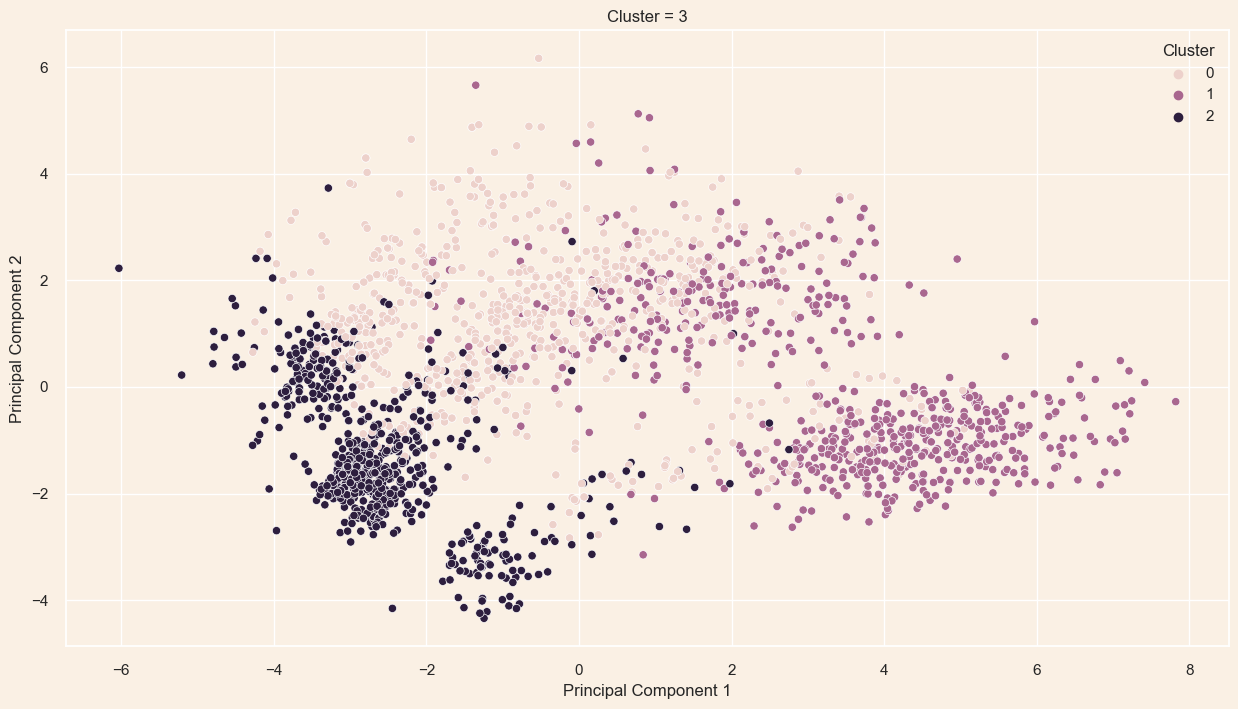

In [138]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cluster3_data_1 , x="col1" , y="col2" , hue="Cluster" )

plt.title("Cluster = 3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



In [139]:
pca = PCA(n_components=3)
reduce3 = pca.fit_transform(si)
cluster3_data = pd.DataFrame(data=reduce3 , columns=["col1" , "col2" , "col3"])
cluster3_data["Cluster"] = data3["Cluster"]
cluster3_data.head()

col1      col2      col3  Cluster
0  5.116348 -0.084599  2.319408        0
1 -2.793885  0.606725 -2.261580        0
2  2.494411 -0.766545 -0.498219        1
3 -2.847540 -1.758540 -0.607110        2
4 -0.601556  0.566603 -0.052236        0

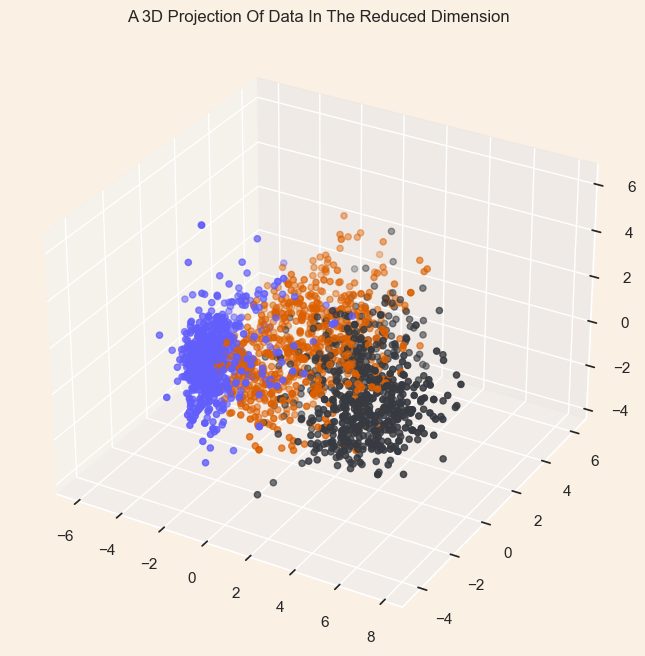

In [140]:
cmap_2 = colors.ListedColormap(['#DC5F00'   , "#373A40" , "#615EFC"])


x =cluster3_data["col1"]
y =cluster3_data["col2"]
z =cluster3_data["col3"]
#To plot

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=cluster3_data["Cluster"], marker="o" ,cmap =  cmap_2)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Cluster 4

In [141]:
data4 = pd.read_csv("data_fix.csv")
data4.head(2)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   

   family_number  Total_cmp  
0              1          1  
1              3          0  

[2 rows x 25 columns]

In [142]:
model_4 = KMeans(n_clusters=4)
pred_cluster_4 = model_4.fit_predict(data4)
data4["Cluster"] = pred_cluster_4

In [143]:
data4.head(3)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   
2          1               1  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0         88              546              172  ...                  7   
1          1                6                2  ...                  5   
2         49              127              111  ...                  4   

   Complain  Age  CustomerAgeInDays  kids  isParent  spent  family_number  \
0         0   67               4433     0         0   1617              1   
1         0   70               3587     2         1     27              3   
2         0   59               3934     0         0    776              2   

   Total_cmp  Cluster  
0          1        0  
1          0        3  
2          0        0  

[3 rows x 26 columns]

In [144]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data4)
si = pd.DataFrame(data=scale_data)
si.head(3)

0         1         2         3         4         5         6   \
0 -0.893586 -1.349603  0.287105 -0.822754 -0.929699  0.310353  0.977660   
1 -0.893586 -1.349603 -0.260882  1.040021  0.908097 -0.380813 -0.872618   
2 -0.893586  0.740959  0.913196 -0.822754 -0.929699 -0.795514  0.357935   

         7         8         9   ...        16       17        18        19  \
0  1.552041  1.690293  2.453472  ...  0.692181 -0.09552  1.018352  1.973583   
1 -0.637461 -0.718230 -0.651004  ... -0.132545 -0.09552  1.274785 -1.665144   
2  0.570540 -0.178542  1.339513  ... -0.544908 -0.09552  0.334530 -0.172664   

         20        21        22        23        24        25  
0 -1.264598 -1.581139  1.676245 -1.758359  0.617244 -1.230634  
1  1.404572  0.632456 -0.963297  0.449070 -0.502808  1.245560  
2 -1.264598 -1.581139  0.280110 -0.654644 -0.502808 -1.230634  

[3 rows x 26 columns]

In [145]:
pca = PCA(n_components=2)
reduce2 = pca.fit_transform(si)
cluster4_data_1 = pd.DataFrame(data=reduce2 , columns=["col1" , "col2"])
cluster4_data_1["Cluster"] = data4["Cluster"]
cluster4_data_1.head()

col1      col2  Cluster
0  5.119460 -0.084709        0
1 -3.025900 -0.132233        3
2  2.610243 -0.596741        0
3 -2.680516 -1.447545        1
4 -0.610985  0.358754        0

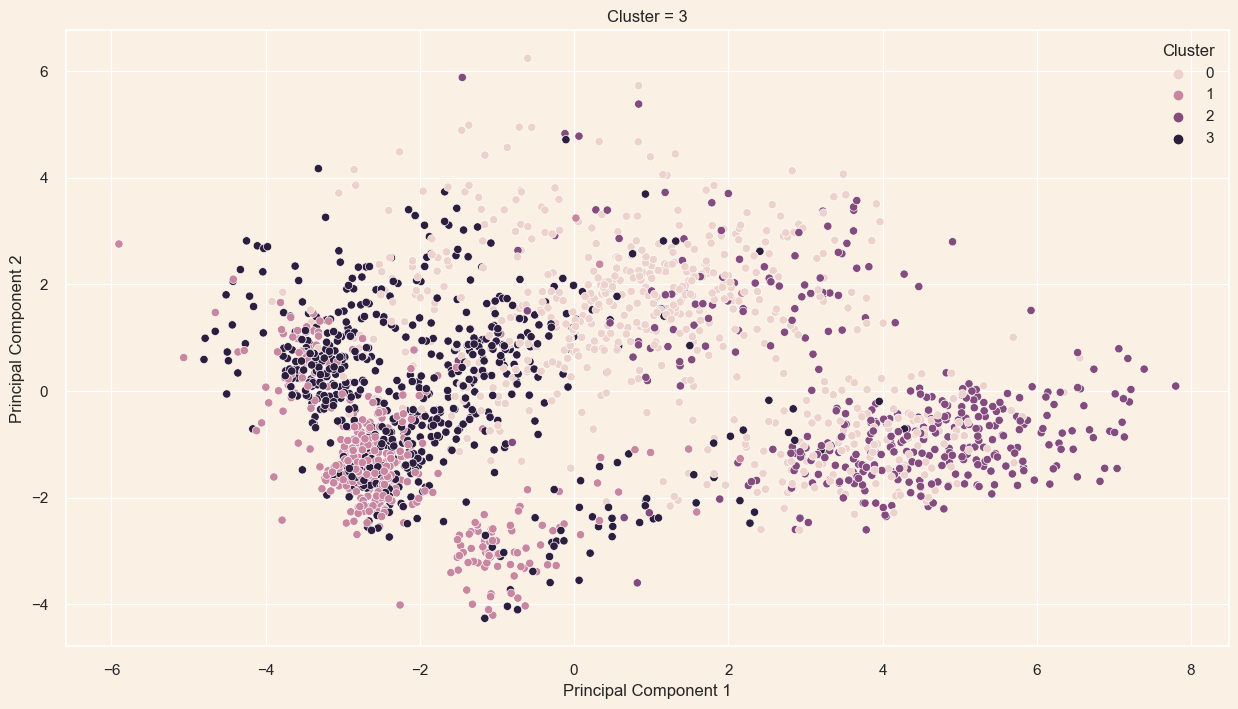

In [146]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cluster4_data_1 , x="col1" , y="col2" , hue="Cluster" )

plt.title("Cluster = 3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



In [147]:
pca = PCA(n_components=3)
reduce4 = pca.fit_transform(si)
cluster4_data = pd.DataFrame(data=reduce4 , columns=["col1" , "col2" , "col3"])
cluster4_data["Cluster"] = data4["Cluster"]
cluster4_data.head()

col1      col2      col3  Cluster
0  5.119460 -0.085085  2.468724        0
1 -3.025911 -0.132876 -1.923861        3
2  2.610297 -0.595067 -0.274007        0
3 -2.680454 -1.444657 -0.762181        1
4 -0.610880  0.363545  0.010030        0

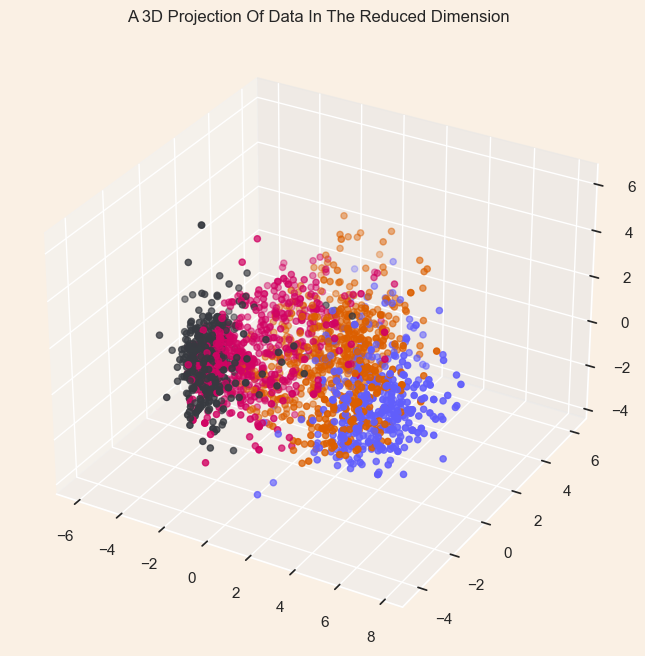

In [148]:
cmap_2 = colors.ListedColormap(['#DC5F00'   , "#373A40" , "#615EFC" , "#D10363"])


x =cluster3_data["col1"]
y =cluster3_data["col2"]
z =cluster3_data["col3"]
#To plot

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=cluster4_data["Cluster"], marker="o" ,cmap =  cmap_2)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()



berdasarkan skor Siluet, dan visualisasi klaster, pilihan terbaik adalah menggunakan 2 klaster.

# apply 2 clusters

In [149]:
data = pd.read_csv("data_fix.csv")
data.head(3)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   
2          1               1  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0         88              546              172  ...                  4   
1          1                6                2  ...                  2   
2         49              127              111  ...                 10   

   NumWebVisitsMonth  Complain  Age  CustomerAgeInDays  kids  isParent  spent  \
0                  7         0   67               4433     0         0   1617   
1                  5         0   70               3587     2         1     27   
2                  4         0   59               3934     0         0    776   

   family_number  Total_cmp  
0              1          1  
1              3          0  
2              2          0  

[3 rows x 25 columns]

In [150]:
model = KMeans(n_clusters=2)
pred = model.fit_predict(data_reduce)
data["cluster"] = pred
clear_dataset["cluster"] = pred



In [151]:
data.head(3)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58138.0        0         0       58       635   
1          1               0  46344.0        1         1       38        11   
2          1               1  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0         88              546              172  ...                  7   
1          1                6                2  ...                  5   
2         49              127              111  ...                  4   

   Complain  Age  CustomerAgeInDays  kids  isParent  spent  family_number  \
0         0   67               4433     0         0   1617              1   
1         0   70               3587     2         1     27              3   
2         0   59               3934     0         0    776              2   

   Total_cmp  cluster  
0          1        0  
1          0        1  
2          0        0  

[3 rows x 26 columns]

In [152]:
clear_dataset.head(3)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduate         Single  58138.0        0         0       58       635   
1  Graduate         Single  46344.0        1         1       38        11   
2  Graduate        Partner  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0         88              546              172  ...                  7   
1          1                6                2  ...                  5   
2         49              127              111  ...                  4   

   Complain  Age  CustomerAgeInDays  kids  isParent  spent  family_number  \
0         0   67               4433     0         0   1617              1   
1         0   70               3587     2         1     27              3   
2         0   59               3934     0         0    776              2   

   Total_cmp  cluster  
0          1        0  
1          0        1  
2          0        0  

[3 rows x 26 columns]

0     837
1    1375
Name: cluster, dtype: int64

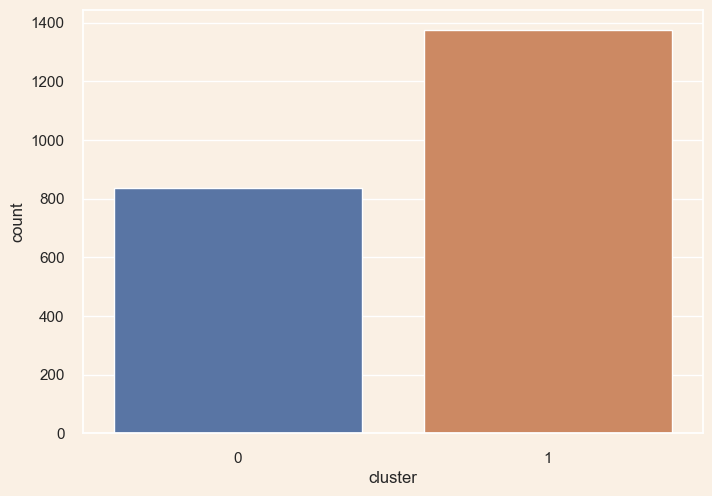

In [153]:
clusters = data['cluster'].value_counts().sort_index()
display(clusters)
sns.countplot(data=data , x="cluster")
plt.show()

# Profilling

Text(0.5, 1.0, 'profilling berdasarkan spent dan income ')

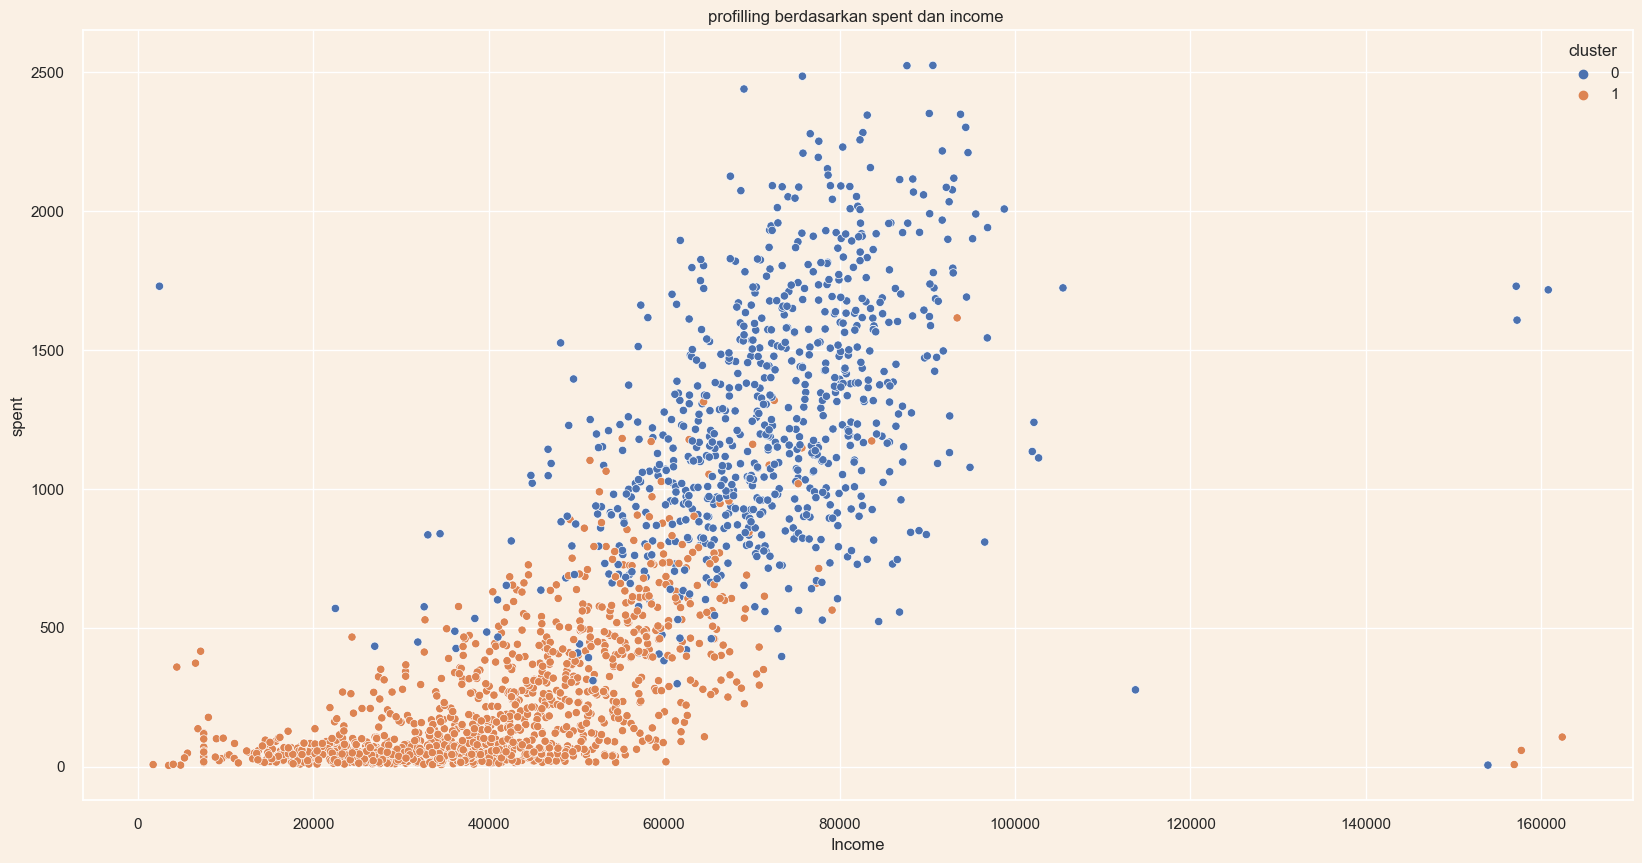

In [154]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data , x="Income" , y="spent" , hue="cluster")
plt.title("profilling berdasarkan spent dan income ")

Cluster Pattern

- Cluster 1 : spent tinggi and  Income tinggi
- Cluster 0 :  spent rendah and    income rendah

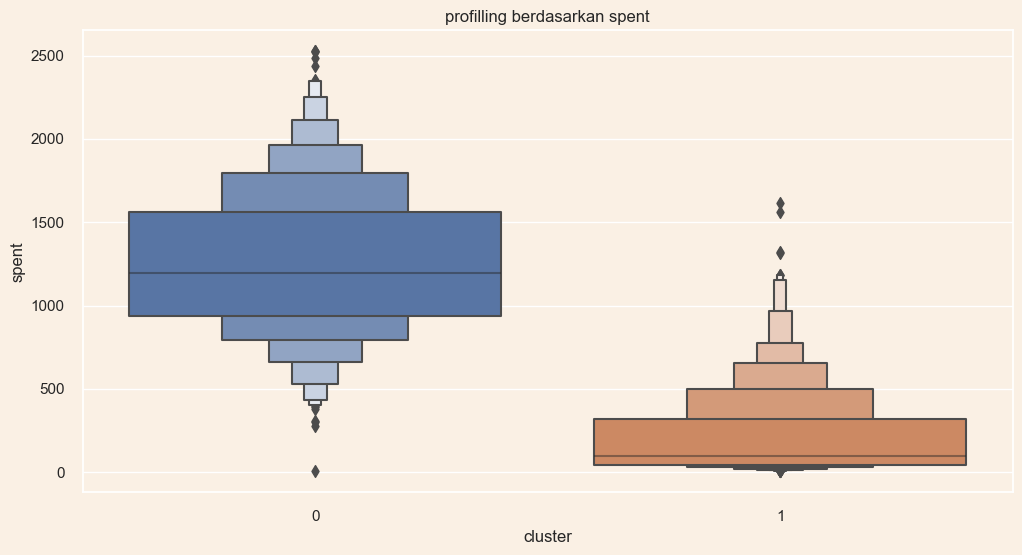

In [159]:
plt.figure(figsize = (12, 6))
sns.boxenplot(data, x = 'cluster', y = 'spent')
plt.title("profilling berdasarkan spent")
plt.show()

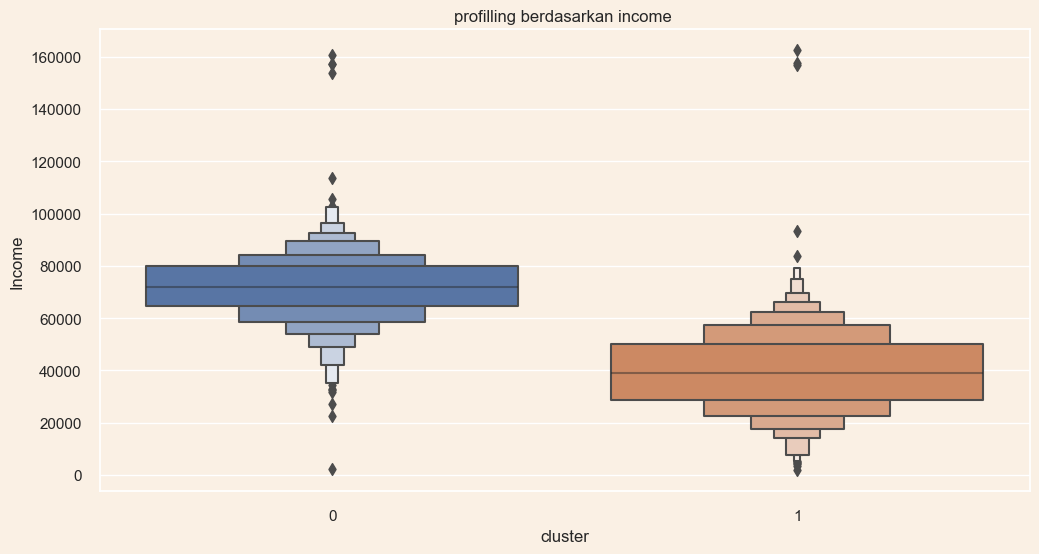

In [160]:
plt.figure(figsize = (12, 6))
sns.boxenplot(data, x = 'cluster', y = 'Income')
plt.title("profilling berdasarkan income ")
plt.show()

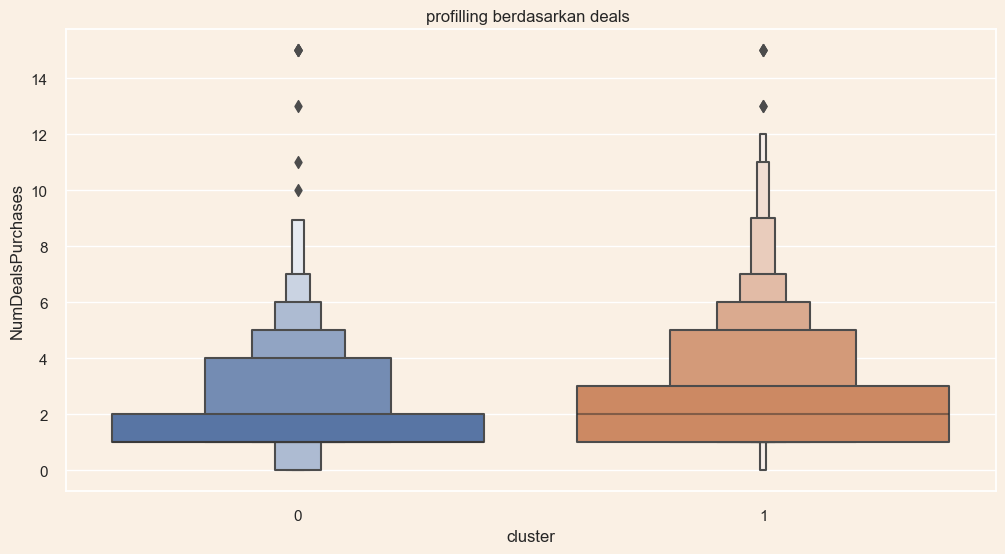

In [161]:
plt.figure(figsize = (12, 6))
sns.boxenplot(data, x = 'cluster', y = 'NumDealsPurchases')
plt.title("profilling berdasarkan deals ")
plt.show()

Pelanggan bintang kami (klaster 0) tidak terlalu tertarik pada penawaran.

In [165]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age',
       'CustomerAgeInDays', 'kids', 'isParent', 'spent', 'family_number',
       'Total_cmp', 'cluster'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

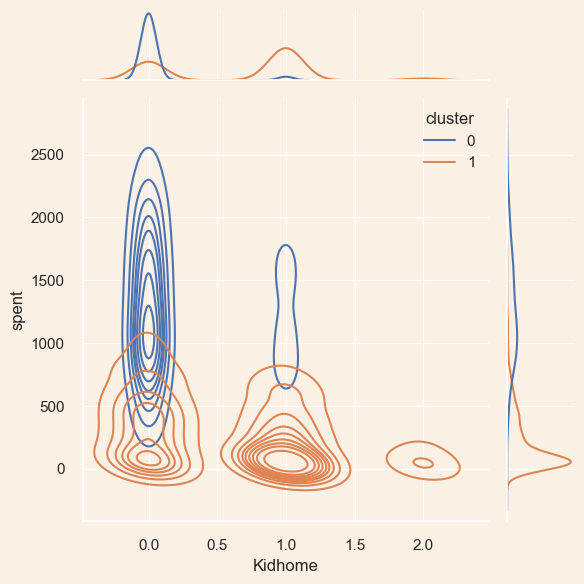

<Figure size 2000x1000 with 0 Axes>

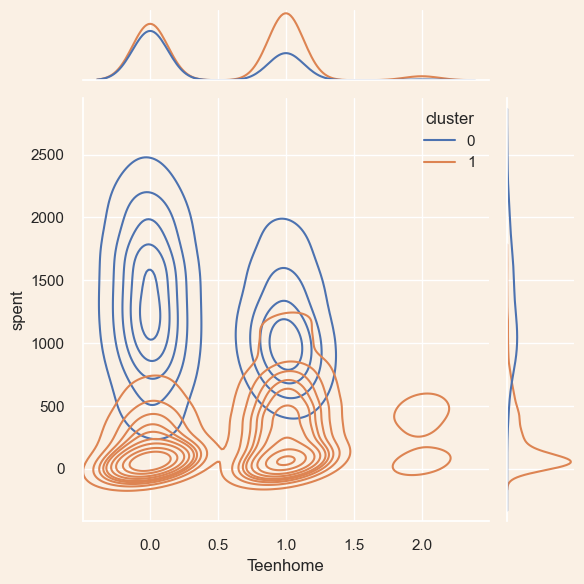

<Figure size 2000x1000 with 0 Axes>

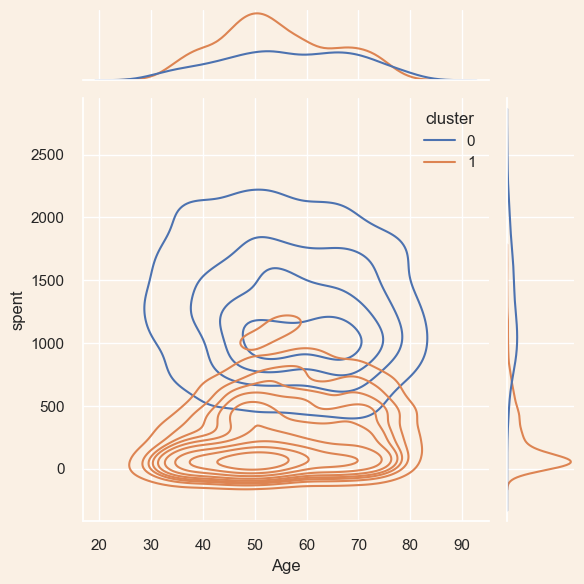

<Figure size 2000x1000 with 0 Axes>

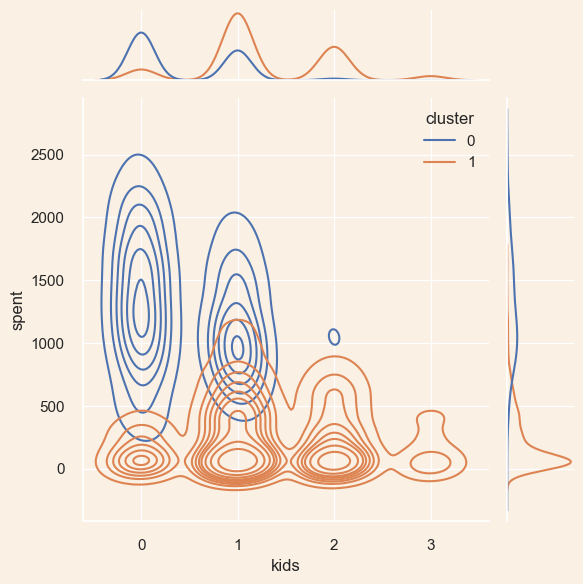

<Figure size 2000x1000 with 0 Axes>

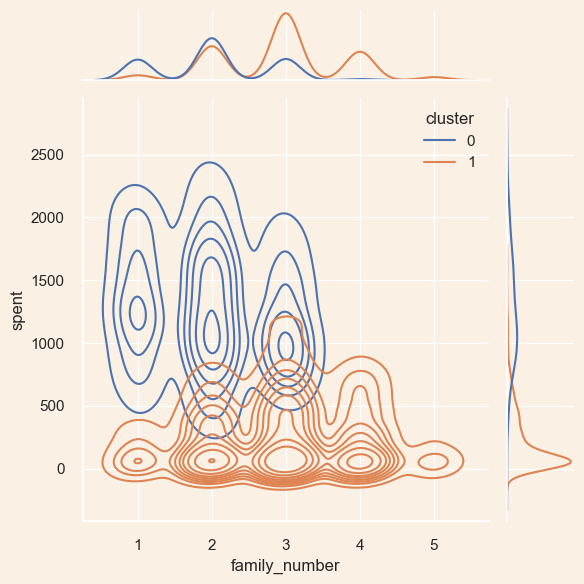

<Figure size 2000x1000 with 0 Axes>

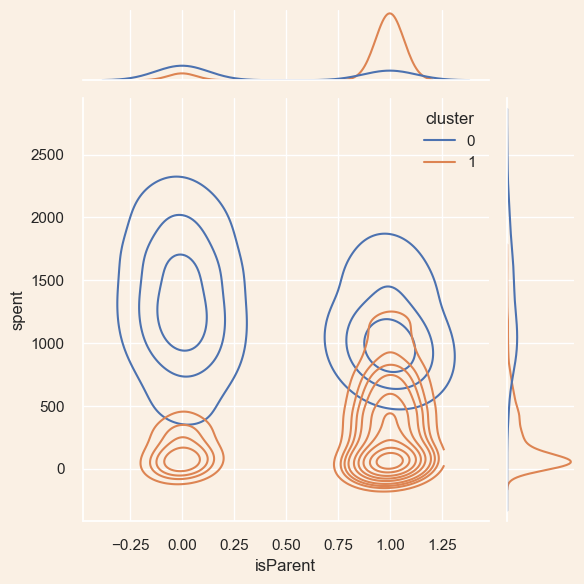

<Figure size 2000x1000 with 0 Axes>

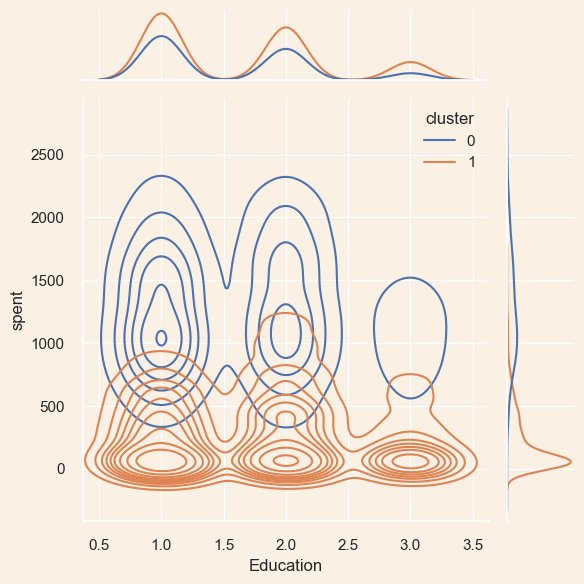

<Figure size 2000x1000 with 0 Axes>

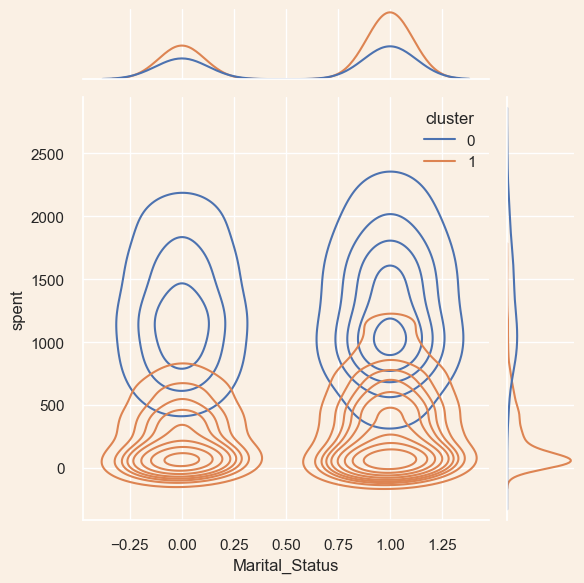

In [172]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'kids', 'family_number', 'isParent', 'Education', 'Marital_Status']

for i in Personal:
  plt.figure(figsize = (20, 10))
  sns.jointplot(x = data[i], y = data['spent'], hue = data['cluster'], kind = 'kde')
  plt.show()